# Faulty Car Prediction Model: "Avoid getting Kicked"
# Part 4: Clustering

**In Part 4 of this analysis, we will perform clustering on the data as part using several different clustering methods as part of our preprocessing step that extracts different features. We will then use those features to build a classifier and analyze its performance in terms of accuracy and speed.**

### Business Understanding Recap
Buying a used car from an auction is risky for a car buyer, but it can also be a risk for a car dealership. With an auction being an as-is purchase, a car dealership can acquire vehicles that require an excessive amount of repairs. The age and mileage of these cars may have exceeded the manufacturer's warranty, which means the cost for readying the car for resell can be very expensive. This dataset was created as a tool for a car dealership to detect bad buys or "kicks". Modeling the data to predict a kick or determining the best auction bid for a used vehicle would be very beneficial to any car dealership that is in engaging in the sale of used vehicles.  

### Performance  Validation Measures
We considered various metrics for measuring the effectiveness of our model. With our dataset, accuracy is always answering to the majority class, so we had to consider other alternatives. Matthew's Correlation Coefficient is a coefficient that works from the confusion matrix by providing a correlation value between the predicted and observed binary classifications. The metric produces a score valued between −1 and +1, with +1 representing a perfect prediction, 0 representing random prediction and −1 representing complete conflict between the observed and predicted values. If we achieve a positive result, even if it is low, we know that we are directionally correct and are hence better than random. We also look at precision and recall. Recall as a measure is important in measuring the effectiveness of our model since false negatives are a financial drain and can hurt the image of the dealership with its clients. True positives are also important because we want to correctly classify the kicks so that those purchases can be avoided and the funds can be used for other opportunities.      

This validation makes sense for this model because the dataset is unbalanced and accuracy is going to be high for the majority class. Missed predictions reflected in the accuracy metric will cost the dealership millions of dollars. The dealership for our dataset spent over $55 million in 2009 and 2010 on vehicles that were later identified as kicks. These costs are further extended through repairs or the labor costs of returning the car to the auction process. Another stakeholder often not considered are the end users who purchase these kicks. Those costs are not captured here, but the maintenance and financial burden of that vehicle extends beyond the car dealership. The dealership's brand is affected because every kick sold can leave the dealership open for unwanted social media attention.
We hope that our model can produce high true positive and low false negative rates. Unfortunately, our dataset does not contain some key information that we feel would help improve the model's results. These additional fields will not be rehashed here, but can be found in the Lab 1 results. We also make mention of model enhancements in the deployment section of this document.
  

## 2.0 Data Understanding

### 2.1 Data Description

The raw dataset consists of 72983 observations, with 34 total variables, 1 of which represents a unique index for the cars purchased. In terms of breakdown, there are:  
•	1 Reference ID  
•	8 Ordinal features, 2 of the 8 being boolean  
•	14 Categorical features  
•	11 Continuous features  

Steps 2.1 -2.3
Upon careful review of the dataset, variables that were repetitive, contained too little information or were determined not to be useful were dropped from the analysis.   At the same time, we decided to import the feature Engineering data fields from lab 1 directly into our final dataset here, for clarity. 

Data variables dropped from analysis are provided in **Table 2.1.2:  Data Variables Dropped** below.  Feature Engineering data variables added to the dataset include: “Cylinder”, “Axle” and “Mileage”.  The final data dictionary, containing data types and full field descriptions, is provided in **Table 2.1.1: Data Dictionary** below.

**Table 2.1.1: Data Dictionary**

|Field Name |Data Type  |Definition|
|-----------|-----------|----------|
|RefID |Categorical |Unique (sequential) number assigned to vehicles|
|Auction |Categorical |Auction provider at which the  vehicle was purchased|
|BYRNO |Numeric |Unique number assigned to the buyer that purchased the vehicle|
|Color |Categorical |Vehicle Color|
|IsBadBuy |Boolean |Identifies if the kicked vehicle was an avoidable purchase |
|IsOnlineSale |Boolean |Identifies if the vehicle was originally purchased online|
|Make |Categorical |Vehicle Manufacturer |
|MMRAcquisitionAuctionAveragePrice |Numeric |Acquisition price for this vehicle in average condition at time of purchase|
|MMRAcquisitionRetailAveragePrice |Numeric |Acquisition price for this vehicle in the retail market in average condition at time of purchase|
|Model |Categorical |Vehicle Model|
|Size |Categorical |The size category of the vehicle (Compact, SUV, etc.)|
|TopThreeAmericanName |Categorical |Identifies if the manufacturer is one of the top three American manufacturers|
|Transmission |Categorical |Vehicles transmission type (Automatic, Manual)|
|VehBCost |Categorical |Acquisition cost paid for the vehicle at time of purchase|
|VehicleAge |Numeric |The Years elapsed since the manufacturer's year|
|VehOdo |Numeric |The vehicles odometer reading|
|VNST |Categorical |State where the the car was purchased|
|WarrantyCost |Numeric |Warranty price (term=36month  and millage=36K)|
|WheelType |Categorical |The vehicle wheel type description (Alloy, Covers, Special)|
|Cylinder |Categorical |The vehicle cylinder type (if specified in vehicle description) |
|Axle |Categorical |Axle Type if specified- categories include:   4WD, FWD, 2WD, AWD. |
|Mileage |Categorical |Vehicles were assigned a ranking of LOW, GOOD, HIGH to each vehicle based on the odometer reading and the vehicle's age. |


**Table 2.1.2: Data Variables Dropped from Analysis**
        

|Field Name |Data Type  |Reason for Elimination |
|-----------|-----------|-----------------------|
|RefID |Numeric |unnecessary |
|PRIMEUNIT |Boolean |Column contained very few real values  and was dropped due to lack of information |
|AUCGUART |Categorical |Column contained very few real values  and was dropped due to lack of information |
|MMRAcquisitionAuctionCleanPrice |Numeric |Multicollinearity issues with MMRAcquisitionRetailAveragePrice and MMRAcquisitionAuctionAveragePrice |
|MMRAcquisitonRetailCleanPrice |Numeric |Multicollinearity issues with MMRAcquisitionRetailAveragePrice and MMRAcquisitionAuctionAveragePrice |
|MMRCurrentAuctionAveragePrice |Numeric |Multicollinearity issues with MMRAcquisitionRetailAveragePrice and MMRAcquisitionAuctionAveragePrice |
|MMRCurrentAuctionCleanPrice |Numeric |Multicollinearity issues with MMRAcquisitionRetailAveragePrice and MMRAcquisitionAuctionAveragePrice |
|MMRCurrentRetailAveragePrice |Numeric |Multicollinearity issues with MMRAcquisitionRetailAveragePrice and MMRAcquisitionAuctionAveragePrice |
|MMRCurrentRetailCleanPrice |Numeric |Multicollinearity issues with MMRAcquisitionRetailAveragePrice and MMRAcquisitionAuctionAveragePrice |
|PurchDate |Numeric |Lacked useful information |
|VehYear |Numeric |Repetative data-Multicollinearity issues with Vehicle Age  |
|WheelTypeID |Numeric |Repetative data-Multicollinearity issues with Wheel Type |
|Nationality |Categorical |Lacked useful information |
|TopThree AmericanName |Categorical |Lacked useful information |
|Trim  |Categorical |Lacked useful information when reviewed independent of other data.  Descriptions did not make sense |
|Submodel |Categorical |Lacked useful information when reviewed independent of other data.  Descriptions did not make sense |
|vzip1 |Numeric |Repetative data-Multicollinearity issues with State |


## 2.2 Data Quality Review

### 2.2.1 Review of Missing Values


To address the issue of missing values, we first replaced “?” with NaN so we can properly aggregate each data variable and group them according to data type: “continuous”, “ordinal”, and “categorical”.   Below are the results:

**Reviewing continuous variables: Classified as “Numeric Features”** 

|Variable|Missing Values|
|--|--|
|MMRAcquisitionAuctionAveragePrice|18|
|MMRAcquisitionRetailAveragePrice|18|
|VehBCost|68|

 Additionally, MMRAcquisitionAuctionAveragePrice was found to have **828** zero's, representing 1.1% of the observations. 


**Reviewing other variables: Classified as “Categorical Features”** 

|Variable|Missing Values|
|--|--|
|WheelType|3174|
|Size|5|

The following refers to **Steps 2.2.1.1 - 2.2.1.3**  

Sklearn’s column transformer was then used to apply the following column transformations based on feature’s grouping classification as “Numeric” or “Categorical”.  

For numeric features, we utilized sklearn’s “SimpleImputer” function to replace missing values using the median along each column then applied sklearn’s “StandardScaler” function to standardize each feature by removing the mean and scaling to unit variance.  

For categorical features, we utilized sklearn’s “SimpleImputer” function to replace missing values using the most frequent value along each column, and then apply sklearn’s “One Hot Encoder” function to encode categorical integer features as a one-hot numeric arrays.  

### 2.2.2  Review of Duplicate Values

Duplicate values were evaluated during the data import step.  The following duplicate features or those showing high multicollinearity values were eliminated from the dataset during the data import process:'VehYear', 'VNZIP1',  'WheelTypeID', 'Nationality', 'TopThreeAmericanName', 'MMRAcquisitionAuctionCleanPrice', 'MMRAcquisitionRetailCleanPrice', 'MMRCurrentAuctionAveragePrice', 'MMRCurrentAuctionCleanPrice', 'MMRCurrentRetailAveragePrice', and 'MMRCurrentRetailCleanPrice'.


### 2.2.3 Outlier Review

The following refers to **Step 2.2.3**    

We note this here for visibility and proceed with caution with the understanding that these potential outliers may need further investigation if they are deemed high leverage. At inspection, we were unable to identify any outliers as invalid entries, therefore we assume that all data points would be included in the analysis.  

Vehicle resale value can often be affected by the number of recalls against the vehicle. We downloaded the National Highway Traffic Safety Administration's recall list to analyze the recalls that were open against the various cars; we were able to identify that the outliers listed below are attributable to a specific recall that was issued across multiple manufacturers for a period of 12 months. Because recalls are not known at the time of original sale, but can be identified prior to repurchase, this reinforces the use of all data points for the analysis.  

Based on this information, there is no valid reason to exclude identified outliers from the analysis at this time.  


### 2.1.1:  Dataset Import

In [1]:
# Standard Data Quality/Cleaning Packages
from sklearn import preprocessing #Data cleaning package
import pandas_profiling #Data quality package

#Data visualization packages
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings

warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline

%config IPCompleter.greedy=True
import pandas as pd
import numpy as np

#Changing the location of this to maintain portability
kick_data = pd.read_csv('C:/git_repositories/DS7331-master/Data/kick.csv')
#kick_data=pd.read_csv("https://www.dropbox.com/s/q2h8uypvc0et5vj/kick.csv?dl=1")

### 2.1.2:  Data Variables Dropped from Analysis

In [2]:
# Drop columns that have too little information to be useful
kick_data.columns = kick_data.columns.str.replace(' ', '')

kick_data = kick_data.drop(['PRIMEUNIT',
                            'AUCGUART', 
                            'PurchDate', 
                            'VehYear',
                            'VNZIP1', 
                            'WheelTypeID', 
                            'Nationality',  
                            'TopThreeAmericanName', 
                            'Trim', 
                            'SubModel',
                            'MMRAcquisitionAuctionCleanPrice',
                            'MMRAcquisitionRetailCleanPrice',
                            'MMRCurrentAuctionAveragePrice',
                            'MMRCurrentAuctionCleanPrice',
                            'MMRCurrentRetailAveragePrice',
                            'MMRCurrentRetailCleanPrice',],axis=1)

### 2.1.3 Feature Engineering added to dataset

In [3]:
# Add Cylinder 
temp=kick_data.Model.fillna("0")
kick_data['Cylinder'] = pd.np.where(temp.str.contains("V6"),"V6",
                   pd.np.where(temp.str.contains("6C"), "V6",
                   pd.np.where(temp.str.contains("4C"), "V4", 
                   pd.np.where(temp.str.contains("8C"), "V8",            
                   pd.np.where(temp.str.contains("V4"), "V4",
                   pd.np.where(temp.str.contains("V8"), "V8", "Unknown"))))))  

# Add Axle
temp1=kick_data.Model.fillna("0")
kick_data['Axle'] = pd.np.where(temp1.str.contains("2WD"),"2WD",
                     pd.np.where(temp1.str.contains("4WD"), "4WD",
                     pd.np.where(temp1.str.contains("FWD"), "FWD",
                     pd.np.where(temp1.str.contains("AWD"), "AWD", "Unknown"))))

# Add Mileage
kick_data.VehOdo=kick_data.VehOdo.fillna("0")
kick_data.VehicleAge=kick_data.VehicleAge.fillna("1")
col1 = 'VehOdo'
col2 = 'VehicleAge'
conditions  = [ (kick_data[col1]/kick_data[col2]) < 10000, 
               ((kick_data[col1]/kick_data[col2]) < 13867) & 
               ((kick_data[col1]/kick_data[col2]) > 10000), 
               (kick_data[col1]/kick_data[col2]) > 13867 ]

choices     = [ "LOW", 'GOOD', 'HIGH' ]

kick_data["Mileage"] = np.select(conditions, choices, default=np.nan)

### 2.2.1 Data Quality Review: Missing Values

In [4]:
# Should be floats
continuous_features = ['VehOdo', 
                       'MMRAcquisitionAuctionAveragePrice',
                       'MMRAcquisitionRetailAveragePrice',
                       'VehBCost',
                       'WarrantyCost']

# Should be int
ordinal_features = ['IsBadBuy', 
                    'VehicleAge', 
                    'BYRNO', 
                    'IsOnlineSale']


# Should be categorical - Add Luxury, Axle, and Mileage
categorical_features = ['Auction',
                        'Make',
                        'Model',
                        'Color',
                        'Transmission',
                        'WheelType', 
                        'Size',
                        'VNST',
                        'Axle',
                        'Mileage',
                        'Cylinder']

# Replace ? data with NaN so we can properly aggregate
kick_data[continuous_features] = kick_data[continuous_features].replace(to_replace='?', value = -9999999)
kick_data[ordinal_features] = kick_data[ordinal_features].replace(to_replace='?', value = -9999999)
kick_data[categorical_features] = kick_data[categorical_features].replace(to_replace='?', value = 'UNKNOWN')

kick_data[continuous_features] = kick_data[continuous_features].astype(np.float64)
kick_data[ordinal_features] = kick_data[ordinal_features].astype(np.int64)

kick_data[continuous_features] = kick_data[continuous_features].replace(to_replace=-9999999, value = np.nan)
kick_data[ordinal_features] = kick_data[ordinal_features].replace(to_replace=-9999999, value = np.nan)

In [5]:
# Review of overall data quality
def nullcounts(ser):
    return ser.isnull().sum()

def detail_describe(frame, func=['count', nullcounts, 'mean', 'std', 'min', 'median', 'max'],
                    numeric_only=False, **kwargs):
    return frame.agg(func, **kwargs)

detail_describe(kick_data).transpose()

,count,nullcounts,mean,std,min,median,max
IsBadBuy,72983,0,0.122988,0.328425,0,0,1
Auction,72983,0,NaN,NaN,ADESA,NaN,OTHER
VehicleAge,72983,0,4.17664,1.71221,0,4,9
Make,72983,0,NaN,NaN,ACURA,NaN,VOLVO
Model,72983,0,NaN,NaN,1500 RAM PICKUP 2WD,NaN,ZEPHYR 3.0L V6 SFI
Color,72983,0,NaN,NaN,BEIGE,NaN,YELLOW
Transmission,72983,0,NaN,NaN,AUTO,NaN,UNKNOWN
WheelType,72983,0,NaN,NaN,Alloy,NaN,UNKNOWN
VehOdo,72983,0,71500,14578.9,4825,73361,115717
Size,72983,0,NaN,NaN,COMPACT,NaN,VAN


In [6]:
kick_scaled_imputed = kick_data.copy()

In [7]:
# We will utilize pipelining to ensure that trained models go through the proper seperations
# prior to having imputation, transformation, or scaling

from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer


# we want to predict the X and y data as follows:
if 'IsBadBuy' in kick_scaled_imputed:
    y = kick_scaled_imputed['IsBadBuy'].values # get the labels we want
    del kick_scaled_imputed['IsBadBuy'] # get rid of the class label
    X = kick_scaled_imputed.values # use everything else to predict!

#split with stratification on y
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=99, 
                                                    stratify=y)

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])


#numeric_features = kick_scaled_imputed.select_dtypes(include=['int64', 'float64']).columns
numeric_features = [kick_scaled_imputed.columns.get_loc(c) 
                    for c in kick_scaled_imputed.select_dtypes(include=['int64', 'float64']).columns 
                    if c in kick_scaled_imputed]

#categorical_features = kick_scaled_imputed.select_dtypes(include=['object']).columns
categorical_features = [kick_scaled_imputed.columns.get_loc(c) 
                        for c in kick_scaled_imputed.select_dtypes(include=['object']).columns
                        if c in kick_scaled_imputed]

preprocessor = ColumnTransformer(
    transformers=[('num', numeric_transformer, numeric_features),
                  ('cat', categorical_transformer, categorical_features)])

In [8]:
#Before we proceed further-lets review the updated dataset to ensure that 
#all missing data issues have been resolved.
kick_scaled_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72983 entries, 0 to 72982
Data columns (total 19 columns):
Auction                              72983 non-null object
VehicleAge                           72983 non-null int64
Make                                 72983 non-null object
Model                                72983 non-null object
Color                                72983 non-null object
Transmission                         72983 non-null object
WheelType                            72983 non-null object
VehOdo                               72983 non-null float64
Size                                 72983 non-null object
MMRAcquisitionAuctionAveragePrice    72965 non-null float64
MMRAcquisitionRetailAveragePrice     72965 non-null float64
BYRNO                                72983 non-null int64
VNST                                 72983 non-null object
VehBCost                             72915 non-null float64
IsOnlineSale                         72983 non-null int64
Warra

### 2.2.3 Outlier Review

In [9]:
# Outlier Review - Unfortunately there is no statistical basis for removing outliers at this time.
#------------------------------------------------------------------------------
# accept a dataframe, remove outliers, return cleaned data in a new dataframe
#------------------------------------------------------------------------------
def show_outliers(df_in, col_name):
    q1 = df_in[col_name].quantile(0.05)
    q3 = df_in[col_name].quantile(0.95)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = pd.concat([df_in.loc[(df_in[col_name] < fence_low)], 
                        df_in.loc[(df_in[col_name] > fence_high)]])
    return df_out


outlier_datapoints = pd.concat([show_outliers(kick_data,'VehBCost'), 
                                show_outliers(kick_data,'WarrantyCost')])
outlier_datapoints

,IsBadBuy,Auction,VehicleAge,Make,Model,Color,Transmission,WheelType,VehOdo,Size,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionRetailAveragePrice,BYRNO,VNST,VehBCost,IsOnlineSale,WarrantyCost,Cylinder,Axle,Mileage
6031,1,MANHEIM,3,LEXUS,GS450H,BLACK,AUTO,Alloy,26113.0,SPECIALTY,23581.0,29269.0,835,AZ,28560.0,0,1121.0,Unknown,Unknown,LOW
15308,1,MANHEIM,2,LEXUS,RX400H AWD,GREY,AUTO,Alloy,13924.0,MEDIUM SUV,32063.0,37885.0,835,CA,36485.0,0,1001.0,Unknown,AWD,LOW
22276,1,MANHEIM,1,TOYOTA,HIGHLANDER 4WD V6,BLACK,AUTO,Alloy,17502.0,MEDIUM SUV,35722.0,39080.0,23359,CA,35900.0,0,702.0,V6,4WD,HIGH
23450,1,MANHEIM,3,TOYOTA,FJ CRUISER 4WD V6,MAROON,AUTO,Alloy,36544.0,MEDIUM SUV,19133.0,23196.0,23359,CA,20380.0,0,522.0,V6,4WD,GOOD
37050,1,MANHEIM,3,INFINITI,M35,GREY,AUTO,Alloy,61001.0,SPECIALTY,23031.0,27295.0,19064,TX,20100.0,0,1020.0,Unknown,Unknown,HIGH
38245,1,MANHEIM,1,FORD,F150 PICKUP 4WD V8,MAROON,AUTO,Alloy,9446.0,LARGE TRUCK,27680.0,31599.0,8655,TX,32300.0,0,941.0,V8,4WD,LOW
38391,1,MANHEIM,2,VOLKSWAGEN,TOUAREG V8,BLACK,AUTO,Alloy,32556.0,MEDIUM SUV,28354.0,30196.0,20833,TX,28180.0,0,1694.0,V8,Unknown,HIGH
48207,1,OTHER,2,CADILLAC,ESCALADE 2WD,BLACK,AUTO,UNKNOWN,20530.0,LARGE SUV,33543.0,36726.0,3582,AZ,45469.0,0,1001.0,Unknown,2WD,GOOD
53072,1,OTHER,3,INFINITI,G35,SILVER,AUTO,UNKNOWN,40023.0,SPECIALTY,18900.0,23456.0,99761,AZ,19000.0,0,764.0,Unknown,Unknown,GOOD
61750,1,ADESA,2,LEXUS,GX470 4WD,WHITE,AUTO,Alloy,10095.0,SPECIALTY,32250.0,35330.0,16926,CA,38785.0,0,941.0,Unknown,4WD,LOW


### 2.3.1 Standard Data Visualizations

To determine which attributes are meaningful, we first looked at the pairwise plot and correlation matrix to get a better understanding of the data (2.3.2), followed by a more detailed analysis used to drill down into any interesting behaviors and/or trends observed. This section includes any interesting trends and/or data attributes of significance (2.3.3).

In this section we explore the relationship that exists between the vehicle’s “Kick” rate and the three data attributes we have selected for our clustering analysis.  Variables selected are the following:   “MMR  Acquisition Auction Average Price”, “vehicle cost of purchase”.  Data visualizations for this section include scatterplot matrix, correlation, cross tabulation and group wise averages.


### Visual 2.3.1a Pairwise Scatterplot Matrix

C:\Python37\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Python37\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


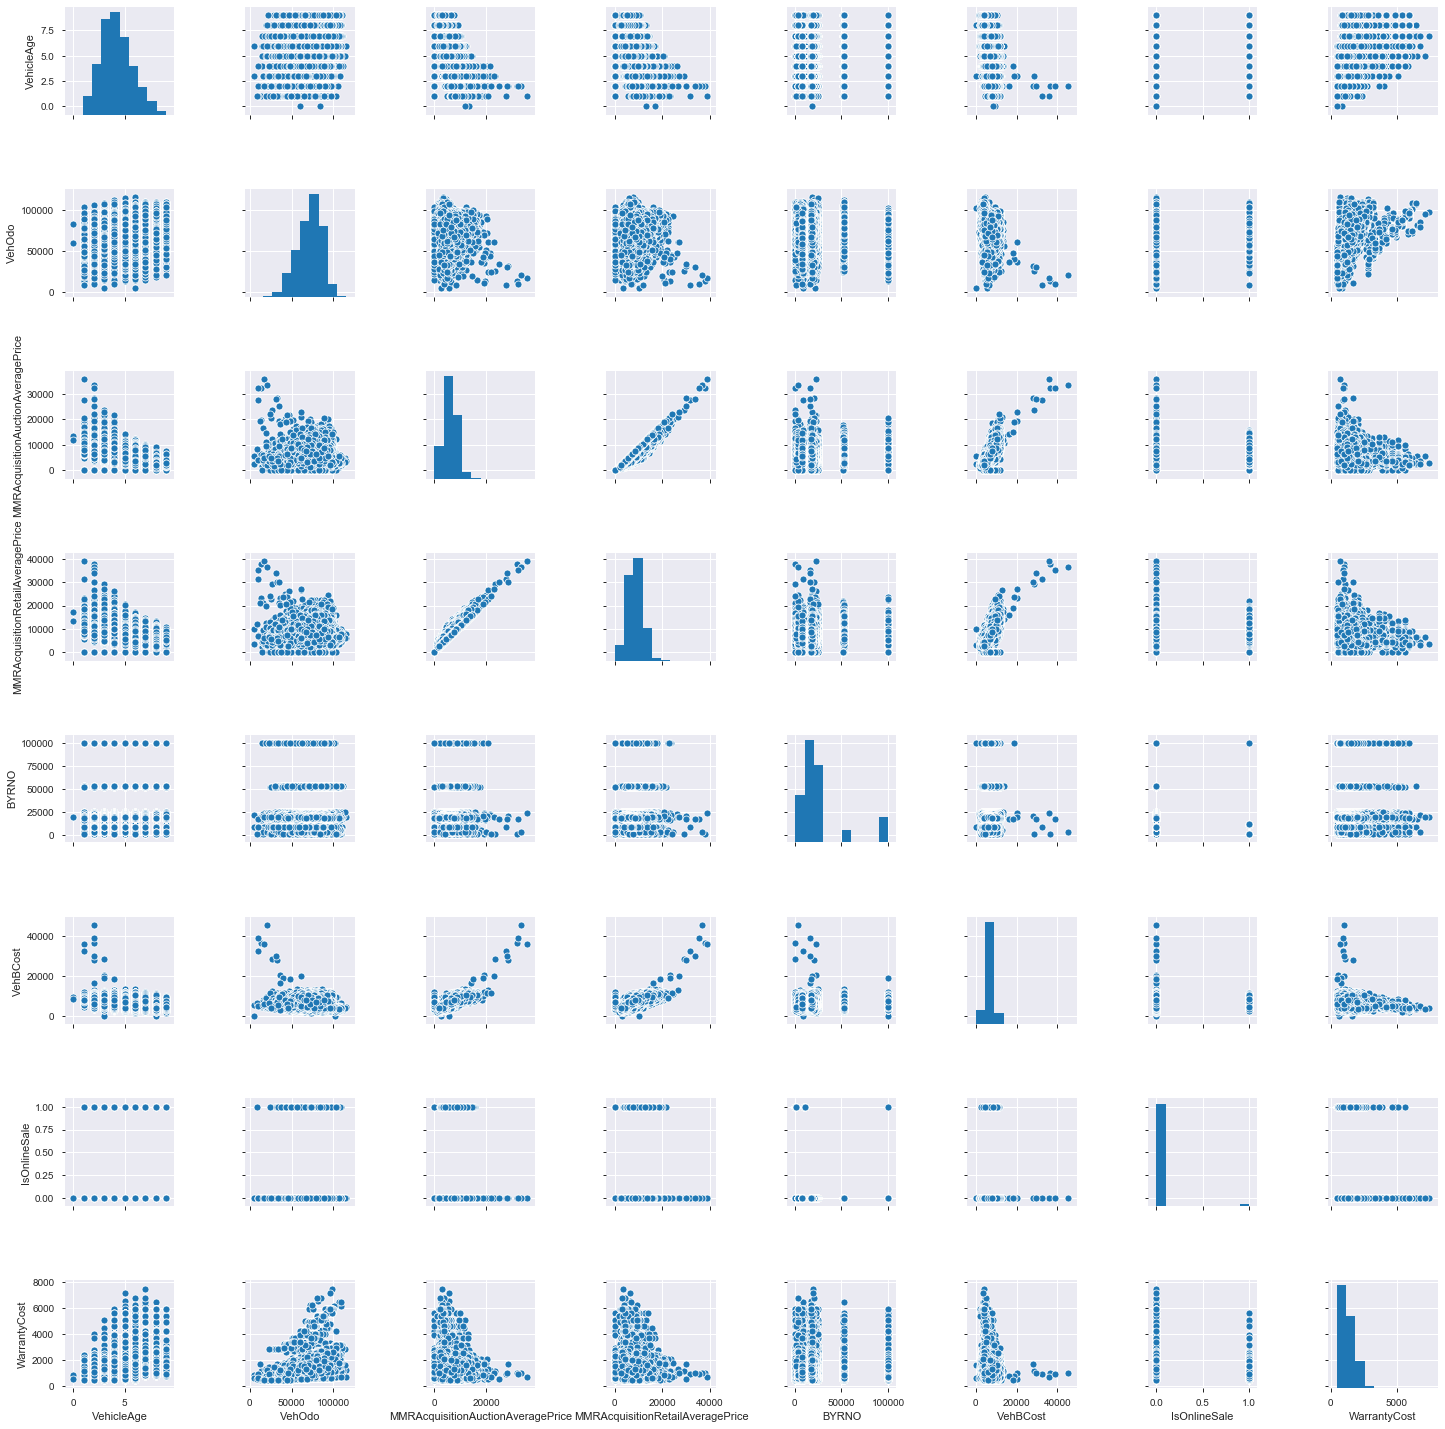

In [10]:
#Pairwise Plot
import seaborn as sns
cmap = sns.diverging_palette(220, 10, as_cmap=True) # one of the many color mappings
sns.pairplot(kick_scaled_imputed)

### Visual 2.3.1b: Correlation Matrix

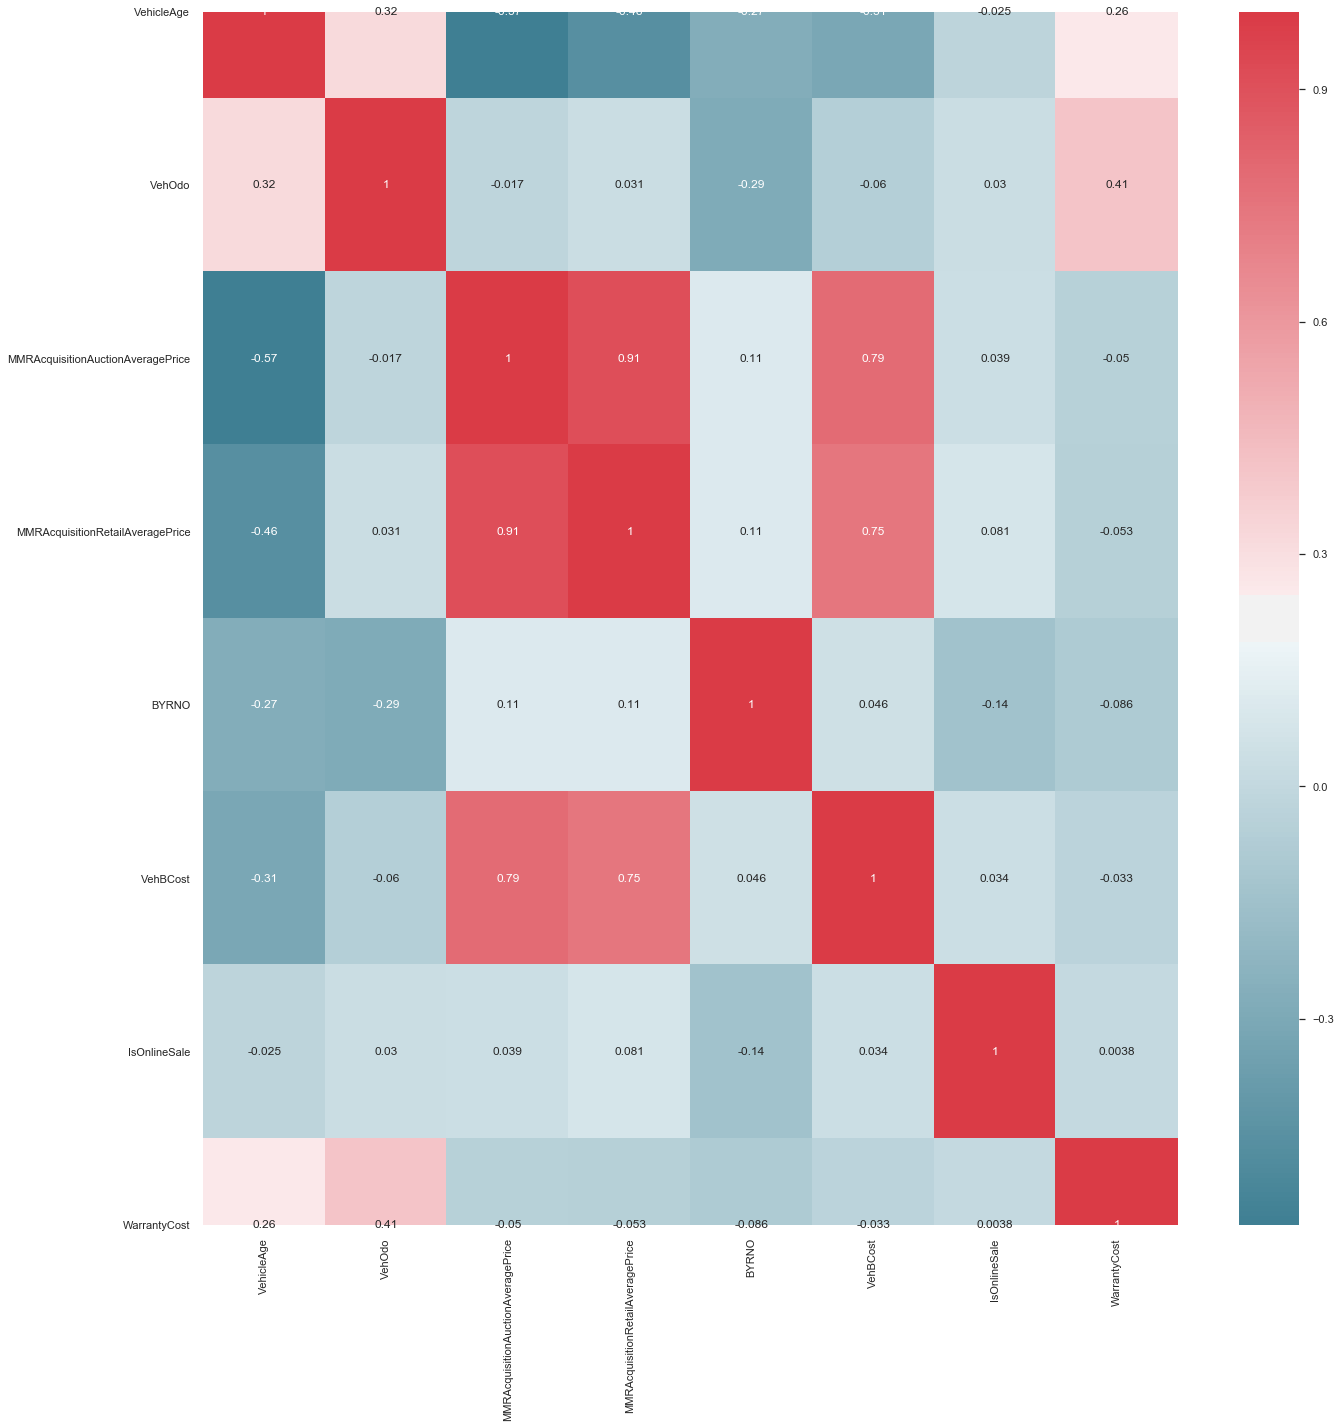

In [11]:
# Correlation Matrix
sns.set(style="whitegrid")

f, ax = plt.subplots(figsize=(20, 20))

sns.heatmap(kick_scaled_imputed.corr(), cmap=cmap, annot=True)

f.tight_layout()

### 2.3.2 Standardized Data Visualizations for Attributes used in Clustering Analysis

### Visual 2.3.2a  Data Attribute Review: Vehicle Age 

Text(0.5, 1.0, 'Normalized Kick Rate based on Age of Vehicle')

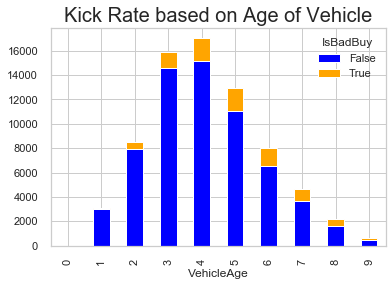

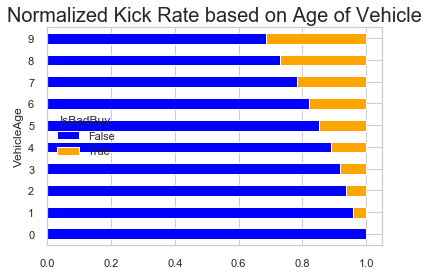

In [12]:
# Lets take a quick look at the cross tabulation of Auction vehicles broken down by age and whether or not it is a bad buy.
# This will help to get a rough estimation of trends and/or groupings worthy of note.

kick_counts = pd.crosstab([kick_data['VehicleAge']], kick_data.IsBadBuy.astype(bool))
kick_counts.plot(kind='bar', stacked=True, color=['blue','orange'])
plt.title("Kick Rate based on Age of Vehicle", fontsize=20)

# Divide the counts to get rates
kick_rate = kick_counts.div(kick_counts.sum(1).astype(float),axis=0)
kick_rate.plot(kind='barh', stacked=True, color=['blue','orange'])
plt.title("Normalized Kick Rate based on Age of Vehicle", fontsize=20)

The average vehicle age is increasing year over year within the used car auction industry, our dataset (2000 - 2010) average vehicle age is four years and for the vehicle population age range between one ~ ten years. It is interesting to note that the population size of kicked vehicles grow at a more rapid rate beginning in year 4.  This timeframe happens to coincide with the expiration date of a standard 4 year lease.  

### Visual 2.3.2b  Data Attribute Review: Vehicle Pricing

Text(0.5, 1.0, 'MMR Acquisition Auction Avg. Price Distribution by Vehicle Age')

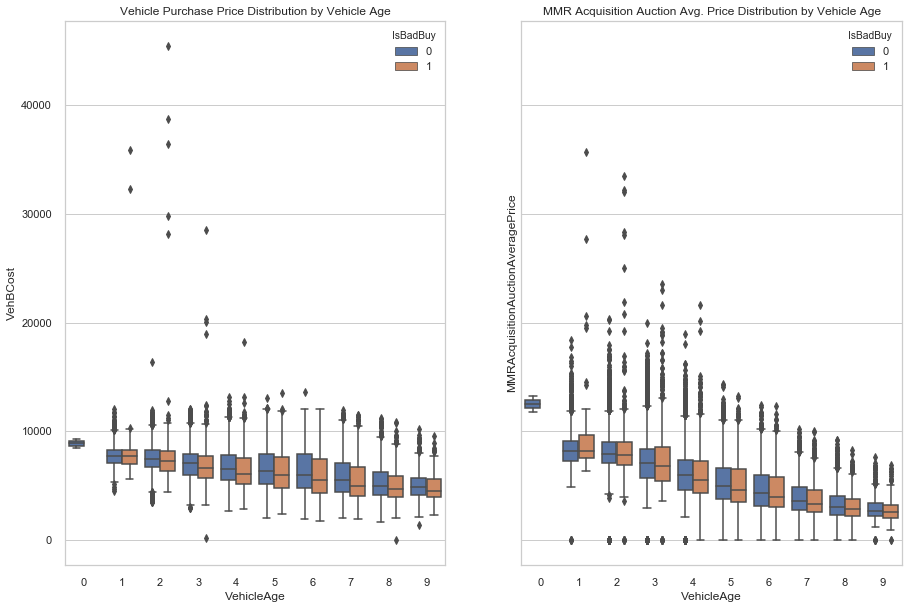

In [13]:
plt.rcParams['figure.figsize']=(15,45)
f, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 10))
a=sns.boxplot(data=kick_data, x="VehicleAge", y="VehBCost", hue="IsBadBuy", ax=axes[0])
b=sns.boxplot(data=kick_data, x="VehicleAge", y="MMRAcquisitionAuctionAveragePrice", hue="IsBadBuy", ax=axes[1])
a.set_title("Vehicle Purchase Price Distribution by Vehicle Age")
b.set_title("MMR Acquisition Auction Avg. Price Distribution by Vehicle Age")

Upon initial review, we observe pricing instability during the first two years of the vehicle’s life cycle. The average acquisition auction price appears to be trending downward at a steady and consistent rate until reaching the age of 4 when the downward trends stalls slightly, allowing the overall long term trend to basically flatten out near a relatively low price. This behavior is consistent with the average vehicle life cycle that tends to peak on or near the 4 year marker. Vehicle purchase pricing (vehicle cost) remains relatively flat when compared to the auction acquisition price trend. Behavior differences can be justified when taking into account the difference in price elasticity between the two pricing models.

### 2.3.3 Data Visualizations for Important Attributes

To determine which attributes are meaningful, we first looked at the pairwise plot and correlation matrix to get a better understanding of the data

Buying a car from auctions benefit the buyer when the buyer has the most amount of information available to them. While most dealers understand that it’s important to price their used vehicles to the market, it is by understanding vehicle features that most informs market demand and pricing.

We feel that the vehicle pricing is a leading indicator for determining what percentage of vehicles are kicked vehicles. Therefore, we analyzed the dataset to explore attributes that are contributing factors for vehicle price. We asked, 'how could these features help predict kick cars as well as help us gain credence on price optimization based on vehicle's exterior, interior, trim and engine specification'.

We determined that pricing, mileage, make, and size are the most important attributes based on preliminary EDA. 

### 2.3.3a Frequency Charts for Top 4 Most Active Attributes

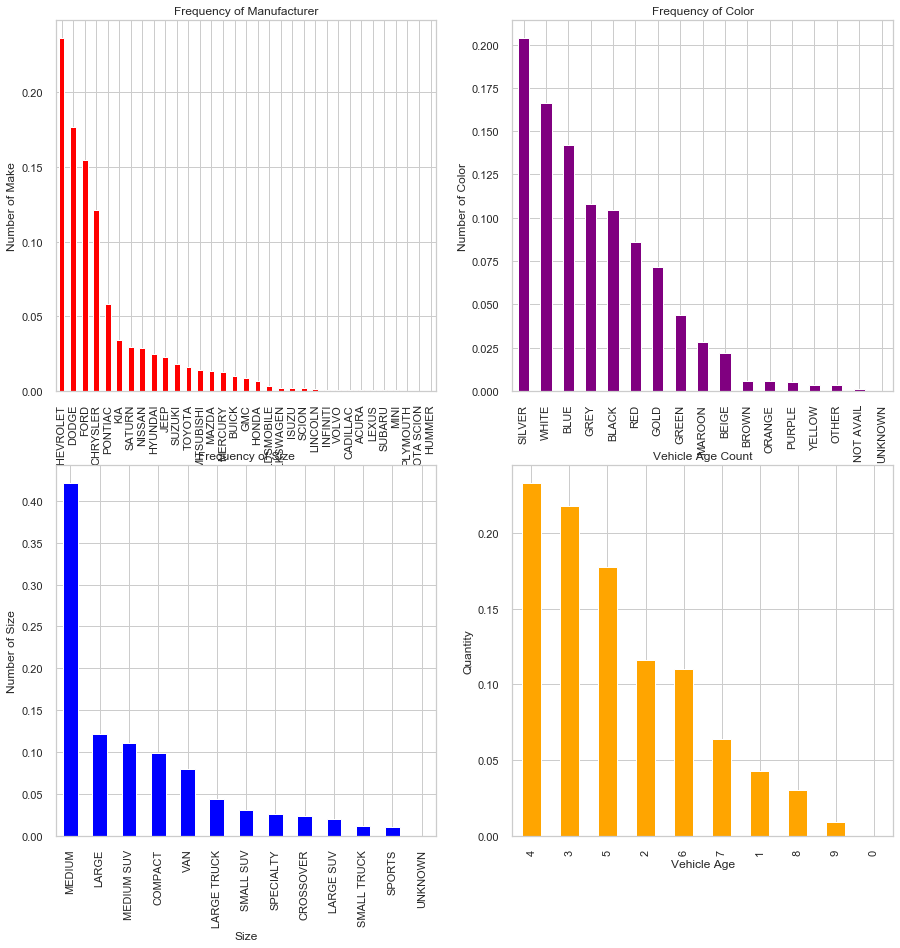

In [14]:
plt.figure(1)
plt.subplot(221)
kick_data['Make'].value_counts(normalize=True).plot(figsize=(10,10),kind='bar',color='red')
plt.title("Frequency of Manufacturer")
plt.ylabel('Number of Make')
plt.xlabel('Make');


plt.subplot(222)
kick_data['Color'].value_counts(normalize=True).plot(figsize=(15,15),kind='bar',color='purple')
plt.title("Frequency of Color")
plt.ylabel('Number of Color')
plt.xlabel('Color');

plt.subplot(223)
kick_data['Size'].value_counts(normalize=True).plot(figsize=(15,15),kind='bar',color='blue')
plt.title("Frequency of Size")
plt.ylabel('Number of Size')
plt.xlabel('Size');

plt.subplot(224)
kick_data['VehicleAge'].value_counts(normalize=True).plot(figsize=(15,15),kind='bar',color='orange')
plt.title("Vehicle Age Count")
plt.ylabel('Quantity')
plt.xlabel('Vehicle Age');

Based on the frequency analysis above, we discovered the following trends/simple relationships that are interesting to note but lack any meaningful determination other than what is presented at face value. During our analysis, we discovered that majority of cars belong to the top three American brand (GM - 35%, Chrysler - 32% and Ford - 17%) with various size cars majority are medium size (42%) followed by full-size (Large) and medium SUV's (12% & 11%) respectively. With respect to the exterior color of the car we can confirm that Black has the highest cost and Red costs the most in warranty cost.  

The top three colors in the dataset were Sliver (20%), White (17%) and Blue (14%). Car price trends expectedly show that 96% have automatic transmissions, and newer cars have high auction prices and lower warranty costs.

### 2.3.3b  Review of Vehicle Product Quality (Mileage vs. Age)

Text(0.5, 1.0, 'Average Vehicle Mileage by Vehicle Age')

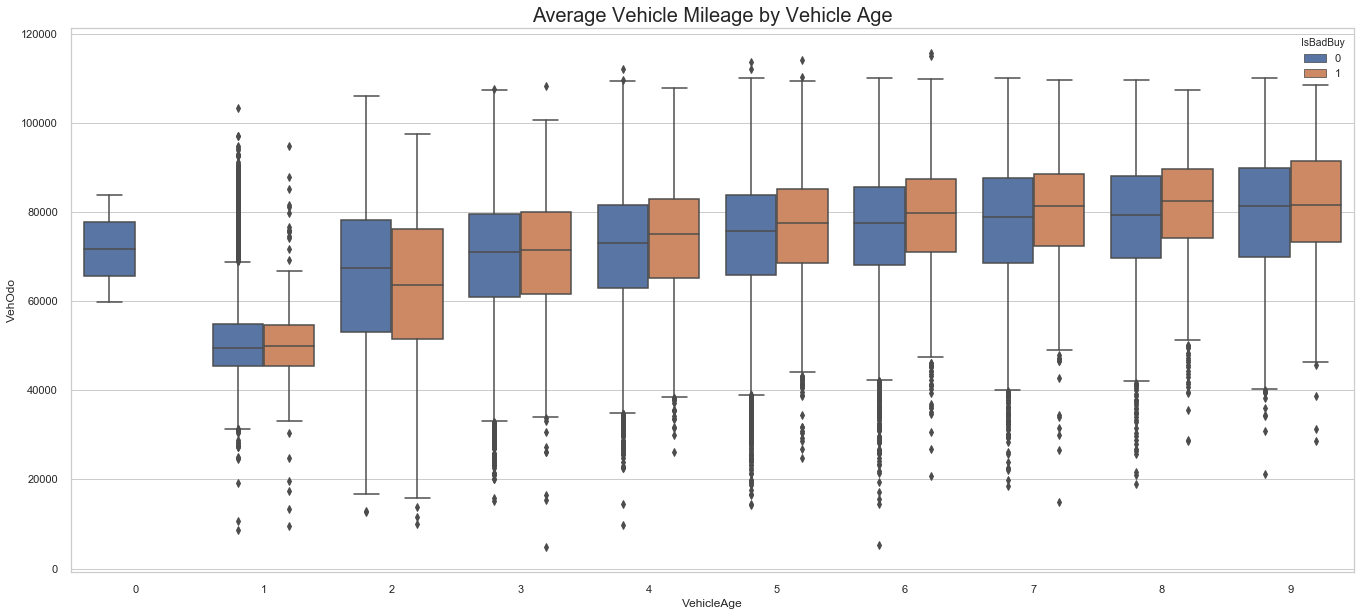

In [15]:
# Whether product quality impacts Kick Rate across the different product types
# Avg. Mileage Price Broken out by VehicleAge

plt.rcParams['figure.figsize']=(23,10)
ax = sns.boxplot(x="VehicleAge", y="VehOdo", hue="IsBadBuy", data=kick_data)
plt.title("Average Vehicle Mileage by Vehicle Age", fontsize=20)

Depreciation is the rate at which a vehicle loses its value over time. The drop in value varies between makes and models but typically is between 15-35% in the first year and up to 50% or more over three years.

There are lots of factors involved in a car’s depreciation, with the biggest being its age and mileage. Both factors can used to determine a car’s wear and tear (i.e. how much the product has been used over the life of the asset). The more miles on a car, the more wear and tear it has accumulated, therefore the less it’s worth.

The chart above illustrates the strong relationship that exists between Mileage and Vehicle Age. We can see this for the first 3 years before reaching the 3 year mark when the good vs. bad buys switched positions, indicating a higher rate of kicked vehicles as vehicles continue to age.

### 2.3.3c  Product Valuation Assessment- Kick Value Price Sensitivity

C:\Python37\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Python37\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


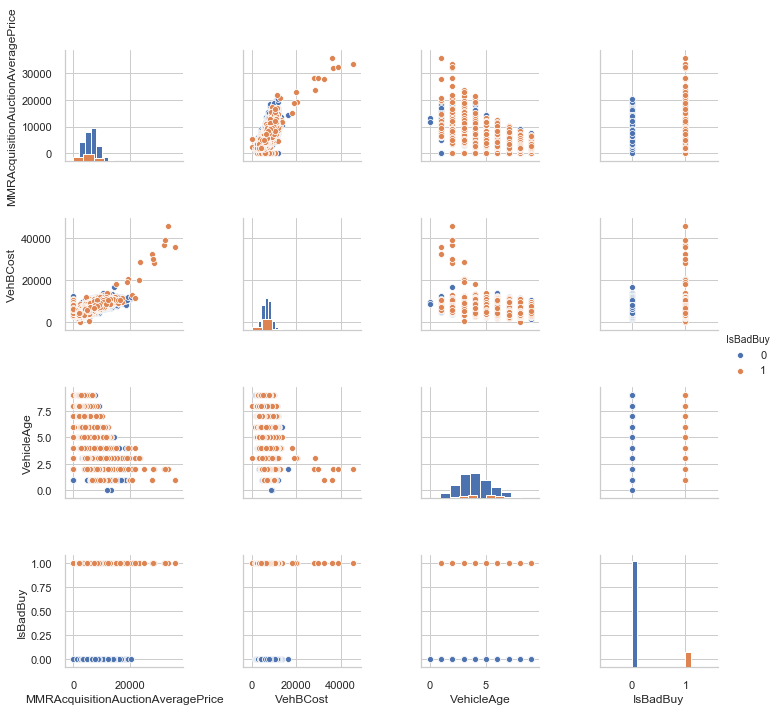

In [18]:
# Product Valuation Assessement- Kick Value Price Sensitivity
# Pair grouping plots segmented by good vs. bad buys

g= sns.pairplot(kick_data[["MMRAcquisitionAuctionAveragePrice", 
                           "VehBCost", "VehicleAge","IsBadBuy"]],
                hue="IsBadBuy", diag_kind="hist")

Based on initial review, we are able to confirm that a linear relationship exists between the MMR Average Auction Acquisition Price and MMR Acquisition Auction Market Retail Price variable.  These results are expected and fall in line with the multicollinearity review that was provided to us from the correlation plots.  As noted earlier during original discovery, the nature of this relationship aligns with expectations.  Most often, whole pricing of highly liquid items is set using some type of multiplier based on the fair market value as determined by the free market. However, we elected to retain the data attributes given the business value generated from being able to apply our model to either the wholesale or private retail market.  It is worth noting, that we are aware of this relationship and take caution when considering which attribute to use versus ignore (task-based).

Moving forward, we examined the relationship between vehicle purchase pricing as a function of age.  Based on the review of the data patterns, we do not see sufficient evidence to suggest any type of relationship to give us concern or suggest the presence of underlying confounding variables.  However, we do see a small cluster of "Kicked" data points with vehicle age of one year or less that reflect a price close to near the median purchase price. Based on initial visualization of the data,  we have identified a small cluster of "Kicked" data points that we feel strongly that further analysis is required. This can be found in the Data Outlier Review process.

### 2.3.3d  Transaction Purchase Trend Review

 - City
 - State
    
The physical location of the car can sometimes lead to additional maintenance and corrosion. The Zip codes and State were include in the dataset but the city associated with that zip code was not included.  We downloaded the zip code database 
and created the City field from a merging of the datasets.  The intent was see if the City was in a flood zone like Houston, New Orleans or other coastal cities along the Gulf of Mexico or Florida.   To show the relationships that we are exploring we are showing the data by state below. 


The zip codes by state show that Florida, Texas and North Carolina have high "kick" counts than other states.  

Text(0.5, 1.0, 'Normalized Kick Rate based on Vehicle Purchase State')

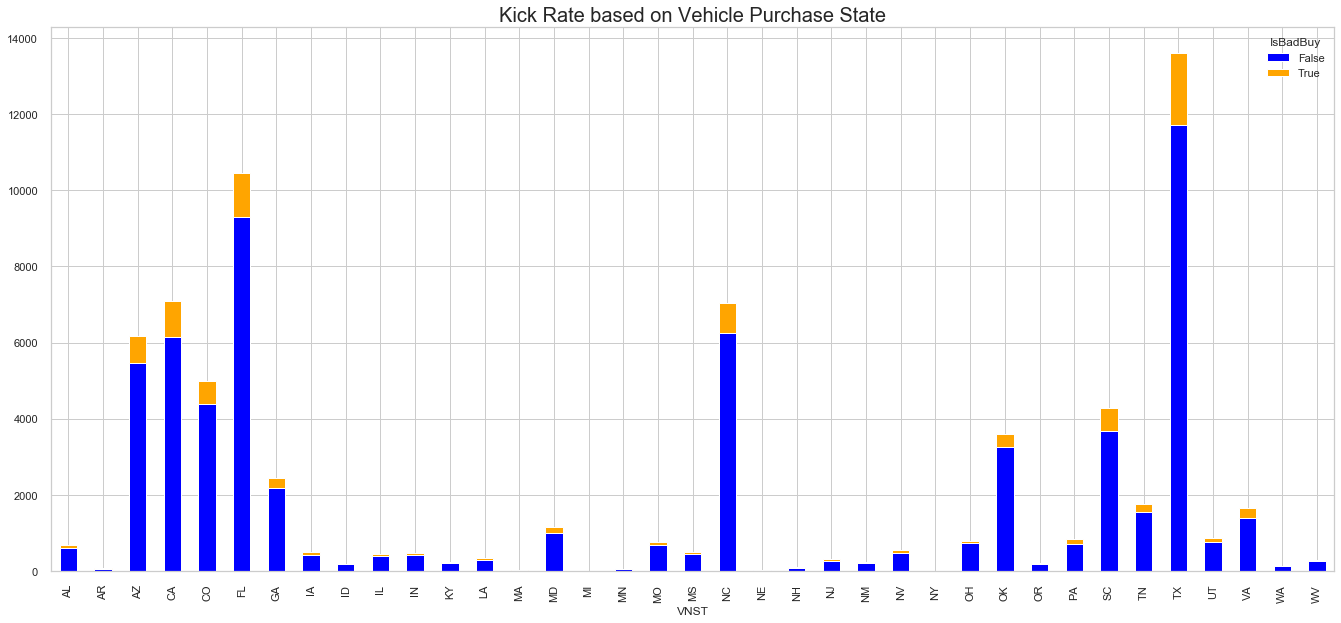

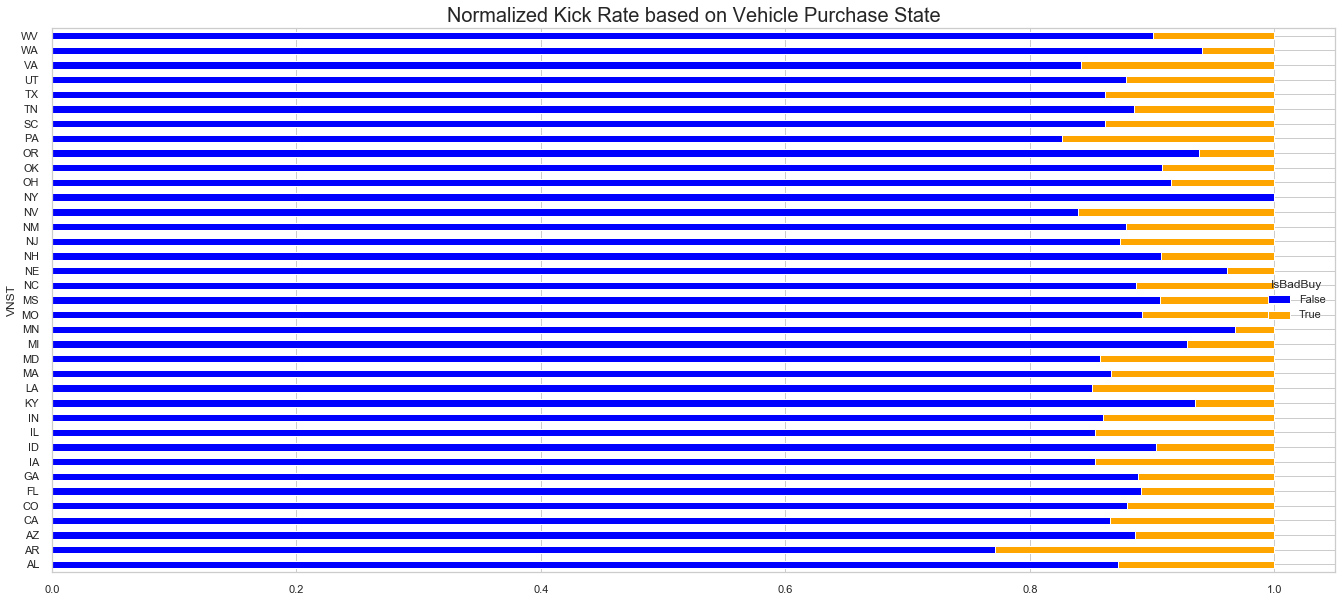

In [25]:
# Lets take a quick look at the cross tabulation of Auction vehicles broken down by state and whether or not it is a bad buy.
# This will help to get a rough estimation of trends and/or groupings worthy of note.

kick_counts = pd.crosstab([kick_data['VNST']], kick_data.IsBadBuy.astype(bool))
kick_counts.plot(kind='bar', stacked=True, color=['blue','orange'])
plt.title("Kick Rate based on Vehicle Purchase State", fontsize=20)

# divide the counts to get rates
kick_rate = kick_counts.div(kick_counts.sum(1).astype(float),axis=0)
kick_rate.plot(kind='barh', stacked=True, color=['blue','orange'])
plt.title("Normalized Kick Rate based on Vehicle Purchase State", fontsize=20)


## 3.0 Cluster Analysis  

### 3.1 Analysis Process Overview: 
**For this analysis we will reoptimize our Bagging model.**  

1) Reformulate imputation, scaling, and process flows utilizing pipelining to ensure test and train datasets are properly segregated.

2) Optimize hyperparameters based on Matthews Correlation Coefficients (MCC). This will help ensure there is proper balancing between Precision and Recall measures.

3) Develop a clustering set to review whether using clustering in addition to the base set of variables improves the model. We will add the clustering as a column, and then rescore the model after training. 


Please note that we utilize pipelining for all critical model builds, and we leverage our custom MCC scorer to determine best fit.

### Step 3.1.1: Pipelining and training baseline model

In [298]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import fbeta_score, matthews_corrcoef, make_scorer
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

def f_half_score(y_true, y_pred):
    return fbeta_score(y_true, y_pred, beta=0.5, average='weighted', pos_label=1)
                       
param_grid = {'classifier__n_estimators':range(10,500,10),
                    'classifier__max_samples':np.arange(0.4, 0.7, 0.01),
                    'classifier__max_features':np.arange(0.7, 0.95, 0.01), 
                    'classifier__bootstrap':[True],
                    'classifier__bootstrap_features':[True]}

scoring = {'AUC': 'roc_auc', 'MCC': make_scorer(matthews_corrcoef, greater_is_better=True)}

classifiers = [BaggingClassifier()]

#print baseline performance for base, unoptimized model
for classifier in classifiers:
    pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', classifier)])
    pipe.fit(X_train, y_train) 
    predic = pipe.predict(X_test)
    print(classifier)
    print("F0.5 model score: %.3f" % f_half_score(y_test, predic))
    print("MCC model score: %.3f" % matthews_corrcoef(y_test, predic))

bagging = Pipeline(steps=[('preprocessor', preprocessor),
                          ('classifier', classifier)])

grid = RandomizedSearchCV(bagging, param_grid, scoring=scoring, refit='MCC', 
                    return_train_score=True, verbose=2, n_jobs = -1, cv = 5, n_iter = 100)

grid.fit(X_train,y_train)
results = grid.cv_results_

# print GridSearch results to find optimal hyperparameters
pd.DataFrame(results)

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=None, verbose=0,
                  warm_start=False)
F0.5 model score: 0.868
MCC model score: 0.372
Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
/Users/chandlervaughn/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed: 44.4min
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed: 204.5min
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed: 506.2min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 822.6min finished


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__n_estimators,param_classifier__max_samples,param_classifier__max_features,param_classifier__bootstrap_features,param_classifier__bootstrap,params,...,mean_test_MCC,std_test_MCC,rank_test_MCC,split0_train_MCC,split1_train_MCC,split2_train_MCC,split3_train_MCC,split4_train_MCC,mean_train_MCC,std_train_MCC
0,1228.860521,6.742953,9.740434,0.295569,260,0.52,0.9,True,True,"{'classifier__n_estimators': 260, 'classifier_...",...,0.414311,0.006697,2,0.731506,0.725676,0.730589,0.735166,0.720399,0.728667,0.005124
1,1062.453160,15.368264,8.903705,0.212315,260,0.52,0.79,True,True,"{'classifier__n_estimators': 260, 'classifier_...",...,0.412115,0.005657,23,0.728849,0.722576,0.722089,0.733708,0.730469,0.727538,0.004532
2,1190.093628,11.776716,11.554540,0.134461,330,0.44,0.82,True,True,"{'classifier__n_estimators': 330, 'classifier_...",...,0.411792,0.006655,25,0.610043,0.607050,0.603746,0.612428,0.600245,0.606702,0.004347
3,1457.732630,9.277361,12.975937,0.199509,400,0.51,0.73,True,True,"{'classifier__n_estimators': 400, 'classifier_...",...,0.405931,0.010229,66,0.707318,0.719286,0.704153,0.711564,0.702183,0.708901,0.006085
4,1697.970123,18.488498,12.463714,0.276137,350,0.61,0.82,True,True,"{'classifier__n_estimators': 350, 'classifier_...",...,0.410049,0.007285,39,0.887435,0.885437,0.880757,0.882774,0.882354,0.883751,0.002379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1077.345268,68.758416,12.034257,0.753446,240,0.4,0.87,True,True,"{'classifier__n_estimators': 240, 'classifier_...",...,0.411619,0.006294,29,0.566287,0.566330,0.561700,0.561948,0.560141,0.563281,0.002548
96,2504.954622,39.854007,20.586124,4.090668,400,0.43,0.91,True,True,"{'classifier__n_estimators': 400, 'classifier_...",...,0.412576,0.006035,20,0.594041,0.591824,0.589619,0.593170,0.588976,0.591526,0.001962
97,852.251396,25.868902,6.211417,0.154594,100,0.68,0.81,True,True,"{'classifier__n_estimators': 100, 'classifier_...",...,0.403488,0.005864,74,0.930421,0.929810,0.930845,0.934039,0.929090,0.930841,0.001705
98,1768.571657,119.893099,8.615024,2.508404,270,0.55,0.79,True,True,"{'classifier__n_estimators': 270, 'classifier_...",...,0.406807,0.008657,58,0.783516,0.776175,0.783438,0.773964,0.782519,0.779922,0.004039


### Step 3.1.2: Save and Display GridSearch Optimization Scores

In [299]:
pd.DataFrame(results).to_csv(r'_randomsearch_train_result.csv', index = False, header=True)

In [3]:
data = pd.read_csv("_randomsearch_train_result.csv") 

In [4]:
#Show pipelined grid search results for model search
pd.DataFrame(data).sort_values(by=['rank_test_MCC']).transpose()

,81,0,38,26,22,34,73,56,23,58,...,44,79,72,70,85,68,35,94,21,60
mean_fit_time,879.796,1228.86,1754.49,1202.33,973.364,1277.39,1604.85,1731.79,1544.04,1989.16,...,1048.53,253.715,1878.29,493.602,425.028,278.302,130.091,1108.65,110.631,92.8548
std_fit_time,10.7489,6.74295,10.194,13.2833,9.76241,14.0226,21.2188,12.7699,15.9711,31.8796,...,5.84993,5.99518,10.4898,10.3323,201.076,3.57217,5.41744,43.8584,4.23998,4.90353
mean_score_time,7.54278,9.74043,16.1406,9.91062,7.36623,11.9755,11.4354,14.2088,12.4981,13.5054,...,8.08558,2.51366,13.536,4.68764,4.367,3.22818,1.12893,10.3045,1.1865,0.919613
std_score_time,0.110452,0.295569,0.328607,0.149439,0.317142,0.327302,0.265441,0.288669,0.101023,0.209936,...,0.0958406,0.0391981,0.302903,0.083766,1.68565,0.0834105,0.0499287,2.14389,0.0118892,0.0664832
param_classifier__n_estimators,180,260,430,250,180,330,290,390,320,330,...,250,70,430,140,100,90,30,230,30,20
param_classifier__max_samples,0.51,0.52,0.44,0.53,0.59,0.45,0.62,0.51,0.54,0.66,...,0.63,0.51,0.67,0.52,0.42,0.4,0.66,0.61,0.5,0.62
param_classifier__max_features,0.94,0.9,0.92,0.91,0.94,0.86,0.92,0.87,0.9,0.94,...,0.7,0.72,0.7,0.7,0.7,0.76,0.71,0.7,0.73,0.74
param_classifier__bootstrap_features,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
param_classifier__bootstrap,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
params,"{'classifier__n_estimators': 180, 'classifier_...","{'classifier__n_estimators': 260, 'classifier_...","{'classifier__n_estimators': 430, 'classifier_...","{'classifier__n_estimators': 250, 'classifier_...","{'classifier__n_estimators': 180, 'classifier_...","{'classifier__n_estimators': 330, 'classifier_...","{'classifier__n_estimators': 290, 'classifier_...","{'classifier__n_estimators': 390, 'classifier_...","{'classifier__n_estimators': 320, 'classifier_...","{'classifier__n_estimators': 330, 'classifier_...",...,"{'classifier__n_estimators': 250, 'classifier_...","{'classifier__n_estimators': 70, 'classifier__...","{'classifier__n_estimators': 430, 'classifier_...","{'classifier__n_estimators': 140, 'classifier_...","{'classifier__n_estimators': 100, 'classifier_...","{'classifier__n_estimators': 90, 'classifier__...","{'classifier__n_estimators': 30, 'classifier__...","{'classifier__n_estimators': 230, 'classifier_...","{'classifier__n_estimators': 30, 'classifier__...","{'classifier__n_estimators': 20, 'classifier__..."


**We see through our charting below that max MCC scores platue for n_estimators > 100, and that rank MCC decreases as sampling levels increase. This could be a concern for overfitting,however, we will test on a seperate test set to ensure optimal performance.**

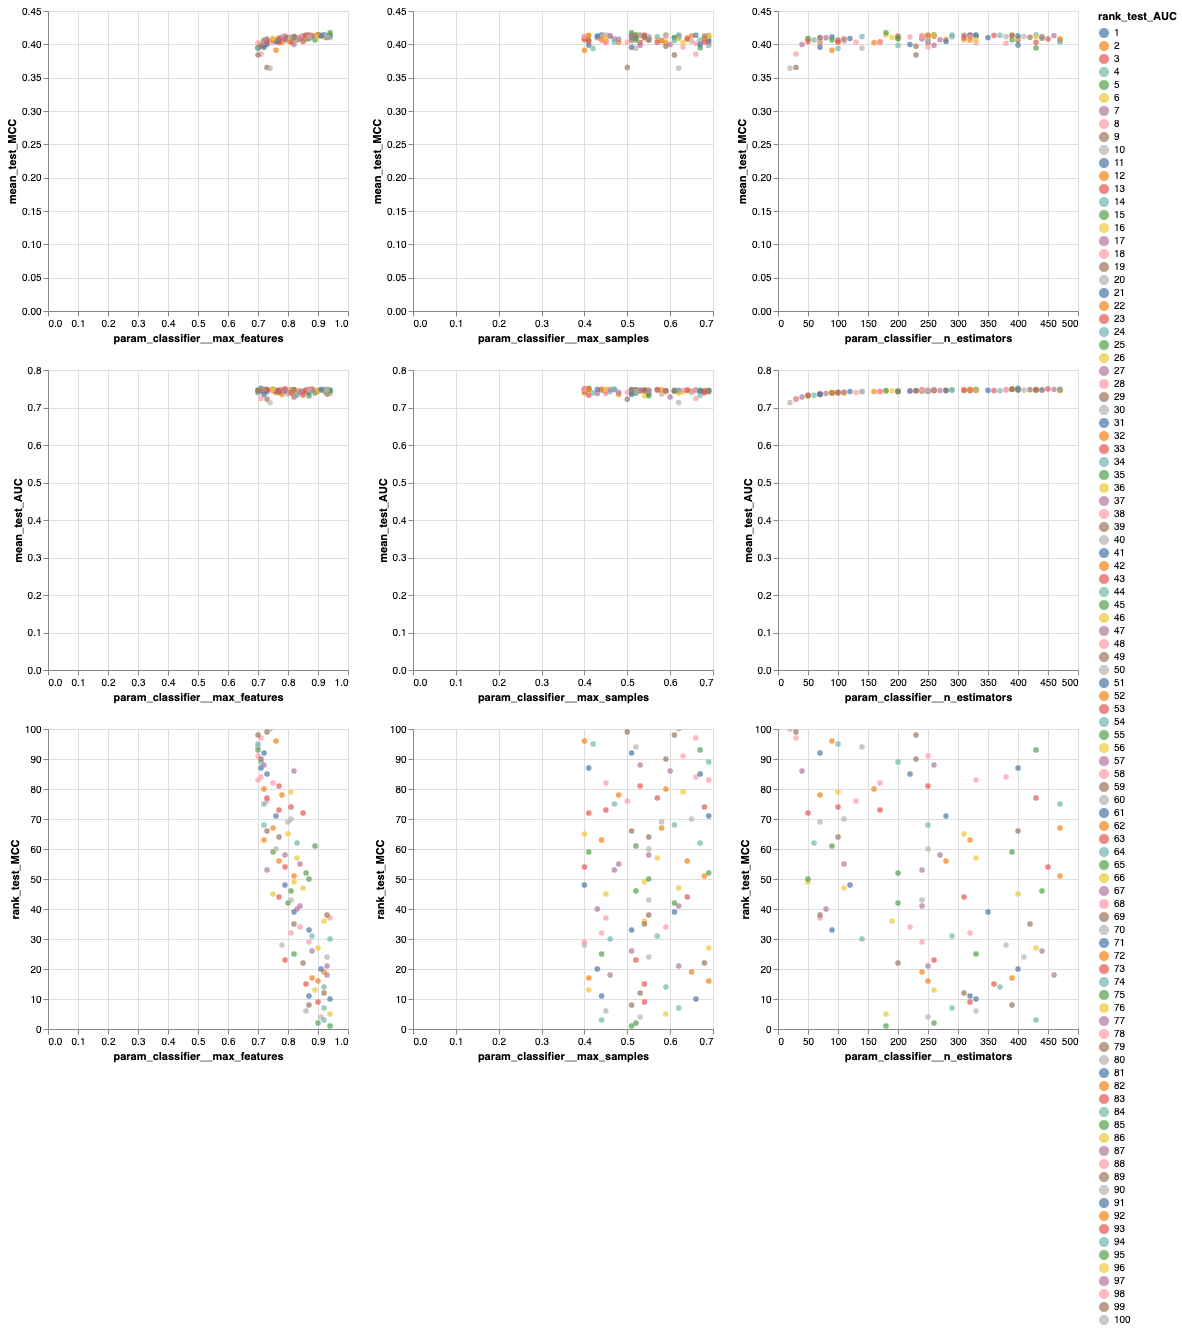

In [305]:
# We see through our charting that max MCC scores platue for n_estimators > 100,
# and that rank MCC decreases as sampling levels increase. This could be a concern for overfitting,
# however, we will test on a seperate test set to ensure optimal performance.

import altair as alt

source = pd.DataFrame(results)

alt.Chart(source).mark_circle().encode(
    alt.X(alt.repeat("column"), type='quantitative'),
    alt.Y(alt.repeat("row"), type='quantitative'),
    color='rank_test_AUC:N'
).properties(
    width=300,
    height=300
).repeat(
    row=['mean_test_MCC', 'mean_test_AUC', 'rank_test_MCC'],
    column=['param_classifier__max_features', 'param_classifier__max_samples', 'param_classifier__n_estimators']
).interactive()

In [307]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__n_estimators,param_classifier__max_samples,param_classifier__max_features,param_classifier__bootstrap_features,param_classifier__bootstrap,params,...,mean_test_MCC,std_test_MCC,rank_test_MCC,split0_train_MCC,split1_train_MCC,split2_train_MCC,split3_train_MCC,split4_train_MCC,mean_train_MCC,std_train_MCC
0,1228.860521,6.742953,9.740434,0.295569,260,0.52,0.9,True,True,"{'classifier__n_estimators': 260, 'classifier_...",...,0.414311,0.006697,2,0.731506,0.725676,0.730589,0.735166,0.720399,0.728667,0.005124
1,1062.453160,15.368264,8.903705,0.212315,260,0.52,0.79,True,True,"{'classifier__n_estimators': 260, 'classifier_...",...,0.412115,0.005657,23,0.728849,0.722576,0.722089,0.733708,0.730469,0.727538,0.004532
2,1190.093628,11.776716,11.554540,0.134461,330,0.44,0.82,True,True,"{'classifier__n_estimators': 330, 'classifier_...",...,0.411792,0.006655,25,0.610043,0.607050,0.603746,0.612428,0.600245,0.606702,0.004347
3,1457.732630,9.277361,12.975937,0.199509,400,0.51,0.73,True,True,"{'classifier__n_estimators': 400, 'classifier_...",...,0.405931,0.010229,66,0.707318,0.719286,0.704153,0.711564,0.702183,0.708901,0.006085
4,1697.970123,18.488498,12.463714,0.276137,350,0.61,0.82,True,True,"{'classifier__n_estimators': 350, 'classifier_...",...,0.410049,0.007285,39,0.887435,0.885437,0.880757,0.882774,0.882354,0.883751,0.002379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1077.345268,68.758416,12.034257,0.753446,240,0.4,0.87,True,True,"{'classifier__n_estimators': 240, 'classifier_...",...,0.411619,0.006294,29,0.566287,0.566330,0.561700,0.561948,0.560141,0.563281,0.002548
96,2504.954622,39.854007,20.586124,4.090668,400,0.43,0.91,True,True,"{'classifier__n_estimators': 400, 'classifier_...",...,0.412576,0.006035,20,0.594041,0.591824,0.589619,0.593170,0.588976,0.591526,0.001962
97,852.251396,25.868902,6.211417,0.154594,100,0.68,0.81,True,True,"{'classifier__n_estimators': 100, 'classifier_...",...,0.403488,0.005864,74,0.930421,0.929810,0.930845,0.934039,0.929090,0.930841,0.001705
98,1768.571657,119.893099,8.615024,2.508404,270,0.55,0.79,True,True,"{'classifier__n_estimators': 270, 'classifier_...",...,0.406807,0.008657,58,0.783516,0.776175,0.783438,0.773964,0.782519,0.779922,0.004039


### 3.1.3 Score the base model and develop a Confusion Matrix
 It is important to note that the Confusion Matrix is, in the end, the best visual depiction of model performance.

In [306]:
#Find the best params based on best MCC score
grid.best_params_

{'classifier__n_estimators': 180,
 'classifier__max_samples': 0.5100000000000001,
 'classifier__max_features': 0.9400000000000002,
 'classifier__bootstrap_features': True,
 'classifier__bootstrap': True}

In [520]:
#Grab the best, optimzed model and run predictions
optimized_bagging = grid.best_estimator_

In [521]:
predic = optimized_bagging.predict(X_test)

In [522]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
print(classification_report(y_test,predic))
print(confusion_matrix(y_test, predic))
print(' ')
print('ROC AUC: ') 
print(roc_auc_score(y_test, predic))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95     12802
           1       0.90      0.23      0.36      1795

    accuracy                           0.90     14597
   macro avg       0.90      0.61      0.65     14597
weighted avg       0.90      0.90      0.87     14597

[[12755    47]
 [ 1387   408]]
 
ROC AUC: 
0.6118133743900567


In [523]:
#Calculate trained and tested metrics to evaluate performance

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

def f2_score(y_true, y_pred):
    return fbeta_score(y_true, y_pred, beta=2, pos_label=1)

def f_half_score(y_true, y_pred):
    return fbeta_score(y_true, y_pred, beta=0.5, pos_label=1)

pred = predic

# Calculate our Metric - accuracy
accuracy = accuracy_score(y_test, pred>0.5)
roc_auc = roc_auc_score(y_test, pred>0.5)
prec = precision_score(y_test, pred)
confusion = confusion_matrix(y_test, pred)

print('Best ROC-AUC:' + str(roc_auc))
print('Best Accuracy:' + str(accuracy))
print('Best Precision:' + str(prec))
print('Best Recall:', recall_score(y_test, pred))
print('F1 Score:', f1_score(np.array(y_test), np.array(pred)))
print('F2 Score:', f2_score(np.array(y_test), np.array(pred)))
print('F0.5 Score:', f_half_score(np.array(y_test), np.array(pred)))
print('MCC:', matthews_corrcoef(np.array(y_test), np.array(pred)))
confusion

Best ROC-AUC:0.6118133743900567
Best Accuracy:0.9017606357470713
Best Precision:0.8967032967032967
Best Recall: 0.22729805013927576
F1 Score: 0.36266666666666664
F2 Score: 0.2671905697445972
F0.5 Score: 0.5643153526970954
MCC: 0.4226041649619168


array([[12755,    47],
       [ 1387,   408]])

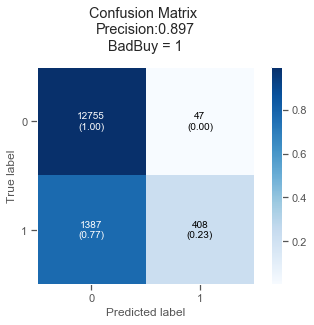

In [524]:
# Confusion Matrix
# Transform to df for easier plotting

import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
cm = confusion

binary = np.array(cm)
fig, ax = plot_confusion_matrix(conf_mat=binary,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)

plt.title('Confusion Matrix \nPrecision:{0:.3f}'.format(prec) + '\nBadBuy = 1')
plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.show()

 Our base model achieved a MCC of ~0.42, and was successful in correctly classifying 408 bad buys.

### 3.1.4 Base Model Performance Evaluation

For our base model we classify roughly 23% of our BadBuy correctly. This is denoted above by the True Label and Predicated Label quadrant of 408 cars. Given our MCC score of 0.42, this is not suprising. We have high precision at almost 90%, meaning those cars that are identified as bad buys are very probable to be bad buys. However, recall lags at 23%. This means the model is missing some 1387 actual bad buys. 

As a next step, we will add clustering and re-evaluate the model. 

## 3.2 Clustering: Exploring clustering to change predictive power

We utilized several methods to deterime the type of clusters and their cluster parameters. We began utilizing the elbow method to determine number of clusters and various parameters for Kmeans, and for DBSCAN clustering methodologies. After this, we performed a full cluster search against MiniBatchKMeans, DBSCAN, and Agglomerative Clustering. These trial clusters were then validated with cross validation against the Matthews Correlation Coefficient (MCC) to determine which cluster gave the most "signal" for the purposes of MCC.


### 3.2.1 Review potential clustering opportunities and data

In [346]:
from sklearn.cluster import KMeans, MiniBatchKMeans
kick_scaled_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72983 entries, 0 to 72982
Data columns (total 19 columns):
Auction                              72983 non-null object
VehicleAge                           72983 non-null int64
Make                                 72983 non-null object
Model                                72983 non-null object
Color                                72983 non-null object
Transmission                         72983 non-null object
WheelType                            72983 non-null object
VehOdo                               72983 non-null float64
Size                                 72983 non-null object
MMRAcquisitionAuctionAveragePrice    72965 non-null float64
MMRAcquisitionRetailAveragePrice     72965 non-null float64
BYRNO                                72983 non-null int64
VNST                                 72983 non-null object
VehBCost                             72915 non-null float64
IsOnlineSale                         72983 non-null int64
Warra

/Users/chandlervaughn/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/chandlervaughn/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


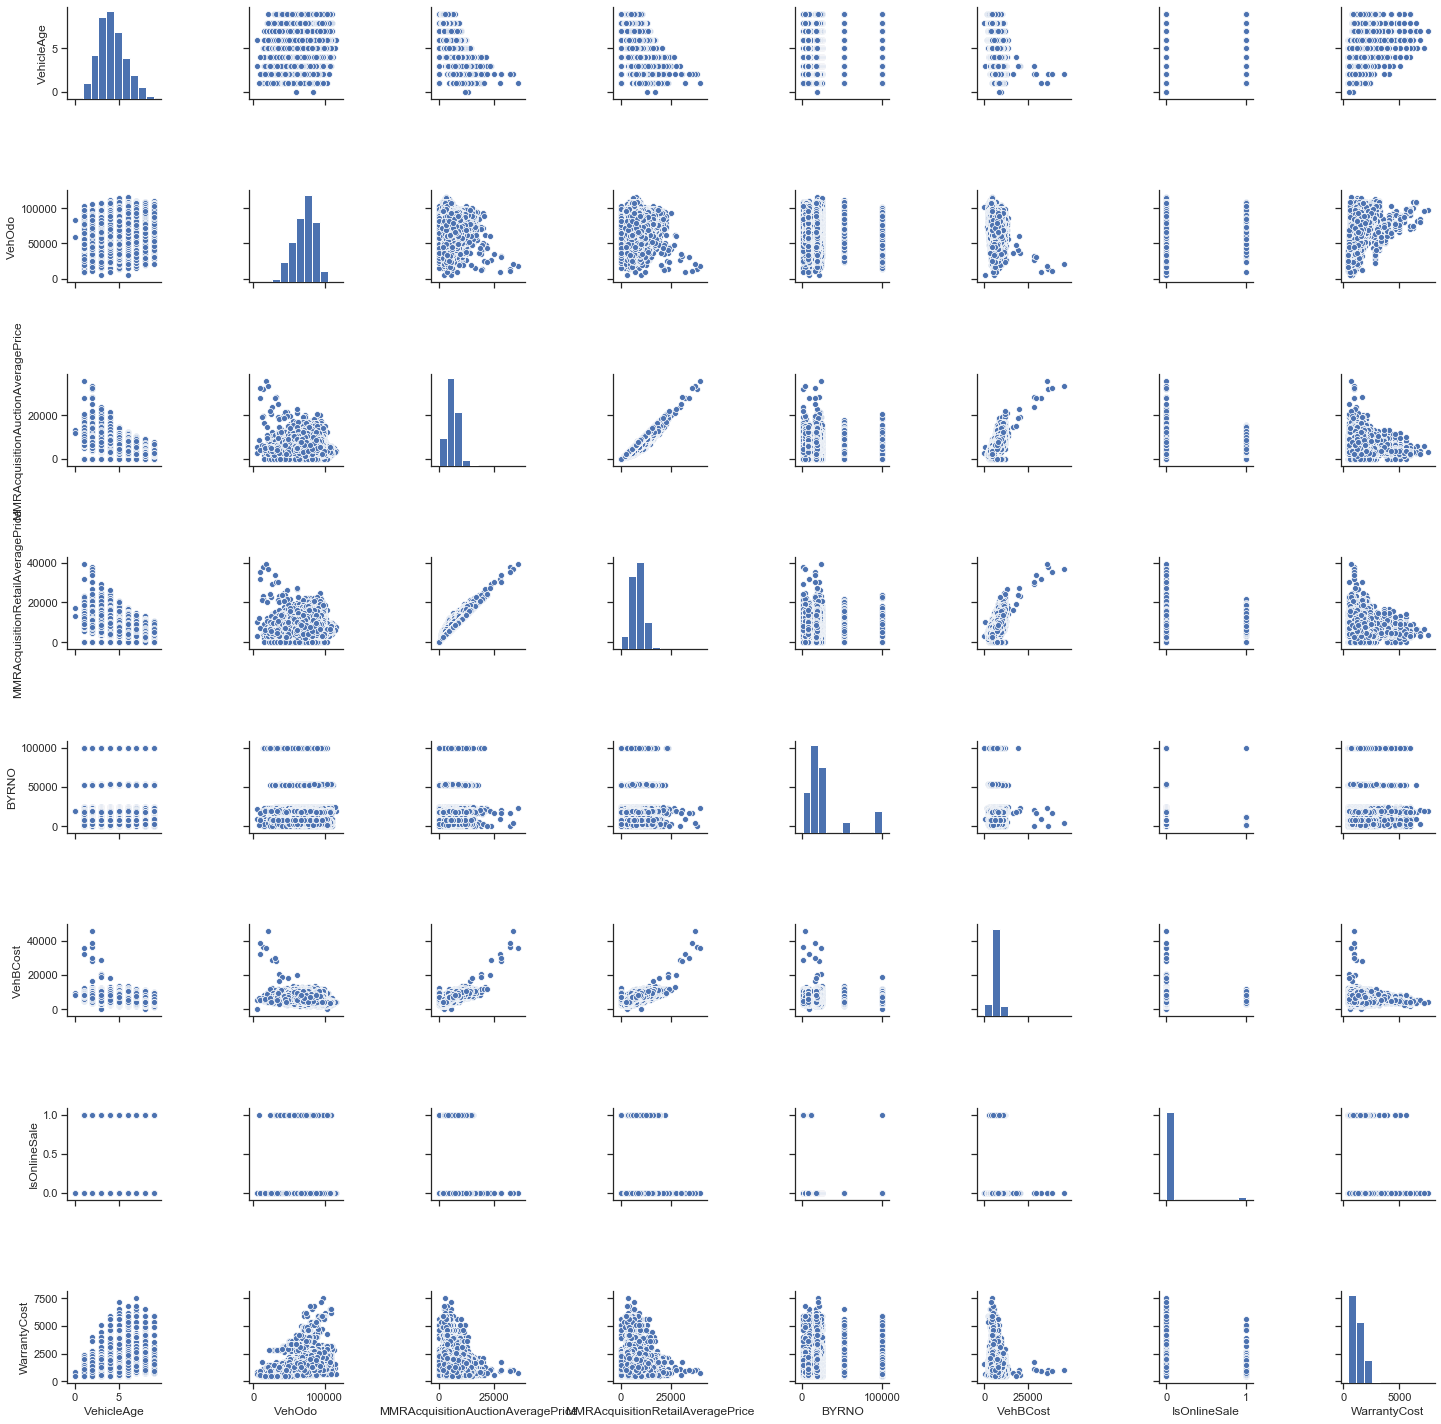

In [336]:
#Lets remind ourselves of the variables, distributions, and possibilities for clustering

%matplotlib inline
import seaborn as sns
sns.set(style="ticks")

sns.pairplot(kick_scaled_imputed)

### 3.2.2 Review Cluster Basics (Elbow Method, MinPts, and Epsilon)

To begin we quickly review potential tuning parameters for clusters. This includes mapping the distortions and clusters, as well as the nearest neighbor distances. After some trial an error we can review the graphics visually to determine potential order of magnitudes for paramters. 

For our clusters we have chosen to cluster on MMRAcquisitionRetailAveragePrice, VehBCost, and VehicleAge as these factors were determined to have the greatest importance for determining bad buys, based on previous modeling. 

Note: We are explicitly not worrying about pipelining for this stage of the exercise as we are merely determining the shape and magnitude of necessary parameters for the clustering. 

In [12]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import train_test_split

#add in new cluster feature
kick_scaled_imputed = kick_data.copy()

X1 = kick_scaled_imputed[['MMRAcquisitionRetailAveragePrice','VehBCost', 'VehicleAge']].apply(lambda grp: grp.fillna(grp.median()))
X1 -= X1.min()  
X1 /= X1.max() 

# we want to predict the X and y data as follows:
if 'IsBadBuy' in kick_scaled_imputed:
    y = kick_scaled_imputed['IsBadBuy'].values # get the labels we want
    del kick_scaled_imputed['IsBadBuy'] # get rid of the class label
    X = kick_scaled_imputed.values # use everything else to predict!

#split with stratification on y
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=99, 
                                                    stratify=y)

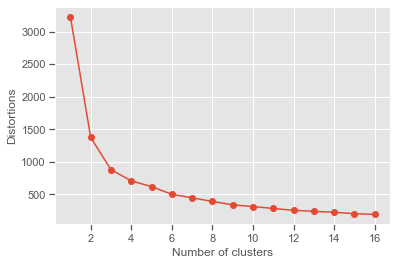

In [391]:
#Lets find the number of cluster to expect for Kmeans
i_range = 17
distortions = []
for i in range(1,i_range):
    mb = MiniBatchKMeans(n_clusters=i, 
                         init='k-means++', 
                         n_init = 10,
                         max_iter = 300,
                         random_state=1)
    mb.fit(X1)
    distortions.append(mb.inertia_)

plt.plot(range(1, i_range), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortions')
plt.show()

**Looks like k = 3 or 4 is proper via the elbow method for Kmeans and Minibatch.**

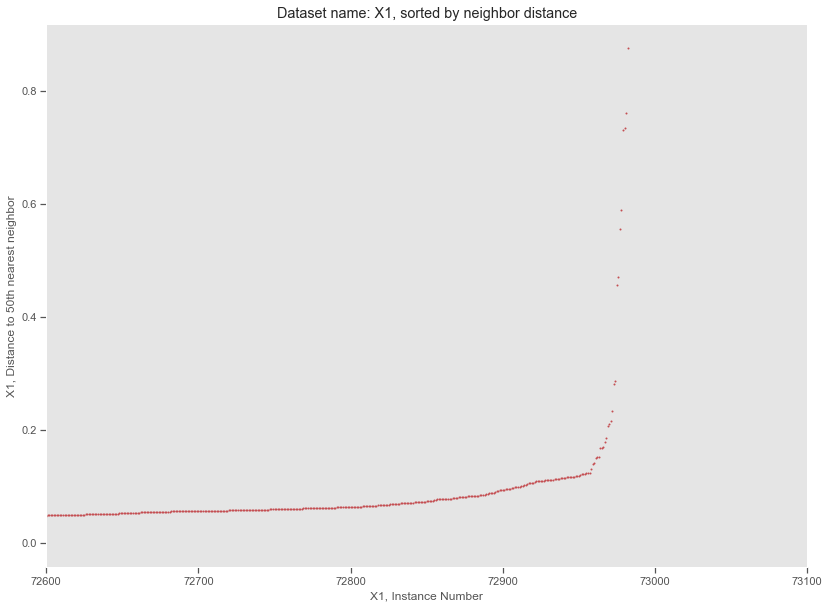

In [433]:
from sklearn.neighbors import kneighbors_graph     
        
# lets first look at the connectivity of the graphs and distance to the nearest neighbors

#=======================================================
# CHANGE THIS VALUE TO ADJUST MINPTS FOR EACH DATASET
X1_N = 50
#=======================================================

# create connectivity graphs before calcualting the hierarchy
X1_knn_graph = kneighbors_graph(X1, X1_N, mode='distance') # calculate distance to four nearest neighbors 

N1 = X1_knn_graph.shape[0]
X1_4nn_distances = np.zeros((N1,1))
for i in range(N1):
    X1_4nn_distances[i] = X1_knn_graph[i,:].max()

X1_4nn_distances = np.sort(X1_4nn_distances, axis=0)


plt.figure(figsize=(30,10))
plt.subplot(1,2,1)
plt.plot(range(N1), X1_4nn_distances, 'r.', markersize=2) #plot the data
plt.title('Dataset name: X1, sorted by neighbor distance')
plt.xlabel('X1, Instance Number')
plt.ylabel('X1, Distance to {0}th nearest neighbor'.format(X1_N))
plt.xlim(left=72600)
plt.xlim(right=73100)
plt.grid()


plt.show()

### Using the elbow method it looks like roughly minPts = 50 to 100 and eps of ~0.1 for the knee.

## 3.2.3 Clustering Search
At this stage, we take the extra step here to determine optimal clustering. This search performs multiple clusters, with varying distance metrics, and scores their impact against MCC. Only clusters with exceeding MCC scores are printed for brevity.

New Max Found: Average MCC =  0.04726810464591955 +- 0.020226211849099316
DBSCAN: euclidean:0.07:10


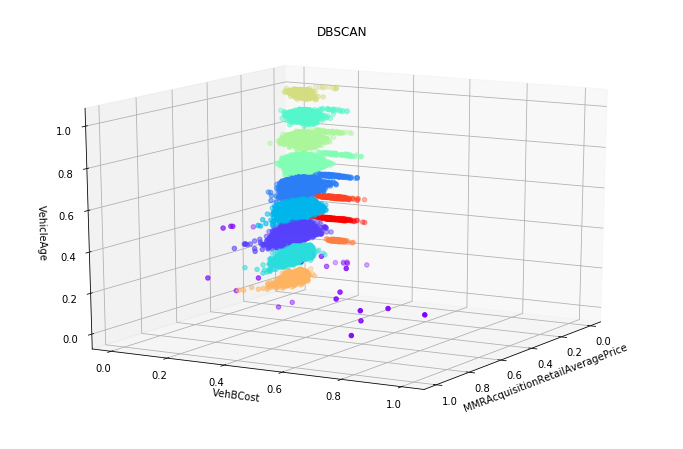

New Max Found: Average MCC =  0.04736086247590905 +- 0.01634527082092287
DBSCAN: euclidean:0.1:400


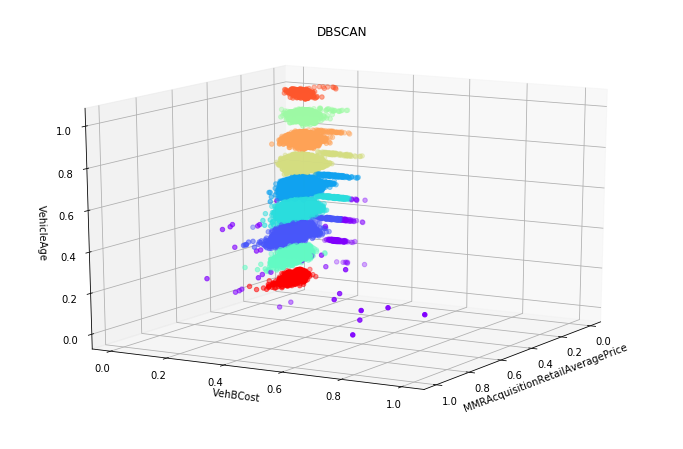

New Max Found: Average MCC =  0.04766568516097271 +- 0.015213251356364262
DBSCAN: euclidean:0.11:200


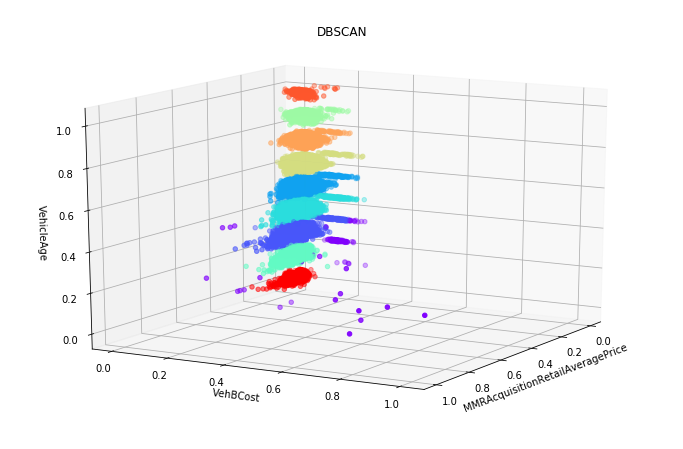

New Max Found: Average MCC =  0.05247594965088145 +- 0.014061364824628919
DBSCAN: cityblock:0.1:100


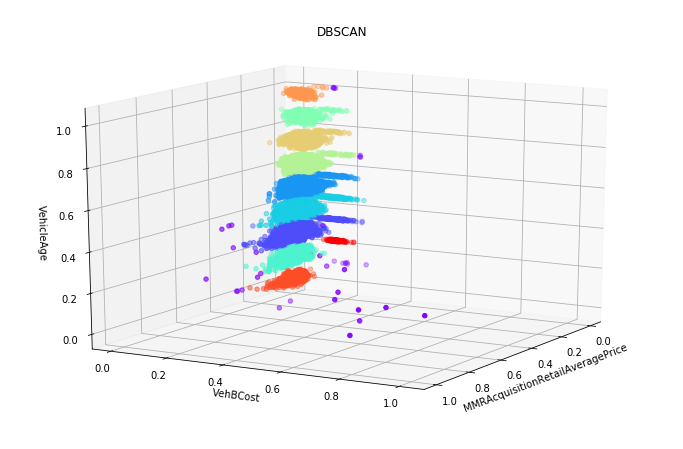

/Users/chandlervaughn/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:872: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


New Max Found: Average MCC =  0.05271116872317898 +- 0.01571656533289748
DBSCAN: l1:0.07:400


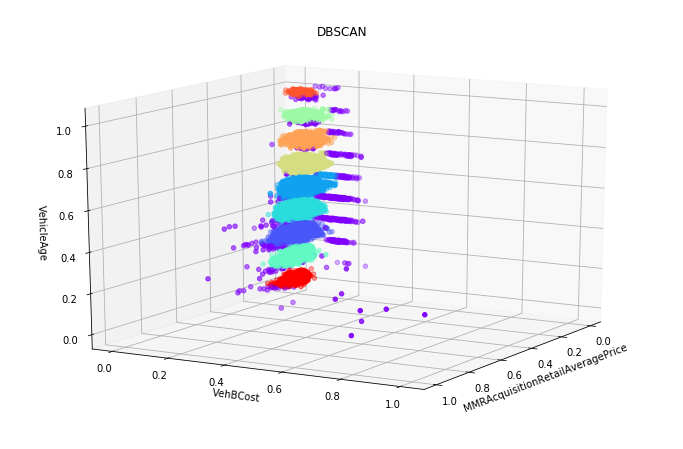

New Max Found: Average MCC =  0.05375521074708517 +- 0.01639946764742105
DBSCAN: l1:0.08:100


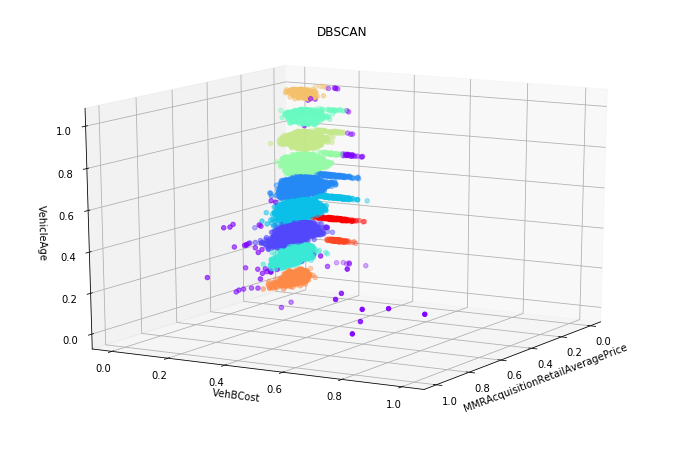

In [15]:
#DBSCAN & MiniBatchKMeans
#USING THE BIG HAMMER HERE TO SEARCH FOR HIGH MCC SCORES FOR IDENTIFING PROPER PARAMS

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt
from joblib import parallel_backend
from sklearn.cluster import AgglomerativeClustering, MiniBatchKMeans
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import matthews_corrcoef, make_scorer
from sklearn.model_selection import cross_val_score, StratifiedKFold

#Params Grids
db_distance = ['euclidean','cityblock','manhattan','jaccard','cosine','l1','l2']
eps = [0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.15]
min_samples = [10,50,100,200,400]
n_clusters = range(3,10)

#function to plot
def plot_clusters(labels):

    ax = fig.add_subplot(111, projection='3d')
    for i,l in enumerate([labels]):
        xs = X1.values[:, 0]
        ys = X1.values[:, 1]+np.random.random(X1.values[:, 1].shape)/100
        zs = X1.values[:, 2]+np.random.random(X1.values[:, 2].shape)/100
        ax.scatter(xs, ys, zs, c=l, cmap=plt.cm.rainbow)
    ax.set_xlabel('MMRAcquisitionRetailAveragePrice')
    ax.set_ylabel('VehBCost')
    ax.set_zlabel('VehicleAge')
    plt.title(title[i])
    ax.view_init(15, 30)
    plt.show()

#Optimal Bagging Params
params = {'n_estimators': 180,
          'max_samples': 0.5100000000000001,
          'max_features': 0.9400000000000002,
          'bootstrap_features': True,
          'bootstrap': True}

mcc_scoring = make_scorer(matthews_corrcoef, greater_is_better=True)
max_mcc = 0

with parallel_backend('threading'):
    #DBScan Cluster Search  
    for d in db_distance:
        for e in eps:
            for s in min_samples:
                cls = DBSCAN(eps=e, min_samples=s, metric=d)
                cls.fit(X1)
                dbs_labels = cls.labels_ 
                X_fit = np.column_stack((X1,pd.get_dummies(dbs_labels)))
                
                mcc = cross_val_score(BaggingClassifier(**params),X_fit,y=y,scoring=mcc_scoring, 
                                      cv=StratifiedKFold(n_splits=10), n_jobs=-1)
                if mcc.mean() > max_mcc:
                    max_mcc = mcc.mean()
                    print ("New Max Found: Average MCC = ", mcc.mean(), "+-", mcc.std())
                    fig = plt.figure(figsize=(12,8))
                    title = ['DBSCAN']
                    print('DBSCAN: ' + d + ':' + str(e) + ':' + str(s))
                    plot_clusters(dbs_labels)

    #MiniBatchKMeans Cluster Search 
    for n in n_clusters:
            cls = MiniBatchKMeans(n_clusters=n, random_state=1)
            cls.fit(X1)
            kmn_labels = cls.labels_
            X_fit = np.column_stack((X1,pd.get_dummies(kmn_labels)))
            
            mcc = cross_val_score(BaggingClassifier(**params),X_fit,y=y,scoring=mcc_scoring, 
                                  cv=StratifiedKFold(n_splits=10), n_jobs=-1)
            if mcc.mean() > max_mcc:
                max_mcc = mcc.mean()
                print ("New Max Found: Average MCC = ", mcc.mean(), "+-", mcc.std())
                fig = plt.figure(figsize=(12,8))
                title = ['MiniBatchKMeans']
                print('MiniBatchKMeans: ' + str(n))
                plot_clusters(kmn_labels)

    #Agglomerative Cluster Search 
    for link in ['ward', 'complete', 'average']:
        for n in n_clusters:
                cls = AgglomerativeClustering(n_clusters=n, linkage=link)
                cls.fit(X1)
                agg_labels = cls.labels_
                X_fit = np.column_stack((X1,pd.get_dummies(agg_labels)))
                
                mcc = cross_val_score(BaggingClassifier(**params),X_fit,y=y,scoring=mcc_scoring, 
                                      cv=StratifiedKFold(n_splits=10), n_jobs=-1)
                if mcc.mean() > max_mcc:
                    max_mcc = mcc.mean()
                    print ("New Max Found: Average MCC = ", mcc.mean(), "+-", mcc.std())
                    fig = plt.figure(figsize=(12,8))
                    title = ['AgglomerativeClustering']
                    print('AgglomerativeClustering: ' + str(n) + ':' + link)
                    plot_clusters(agg_labels)

**The highest MCC signal we achieve for these three features clustered is for DBSCAN, eps = 0.08, mpts = 100, and a distance metric of l1.** 

**DBSCAN works best here to identify edges where cars are outside of normal parameters. We will utilize this clustering for our new feature.**

## 3.2.4 Add new cluster column to dataset

In [18]:
#Create new cluster feature identifying edges
kick_scaled_imputed = kick_data.copy()

cls = DBSCAN(eps=0.08, min_samples=100, metric='l1')
cls.fit(X1)
newfeature = cls.labels_ 
kick_scaled_imputed['PriceCostAgeCluster'] = newfeature

In [19]:
kick_scaled_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72983 entries, 0 to 72982
Data columns (total 21 columns):
IsBadBuy                             72983 non-null int64
Auction                              72983 non-null object
VehicleAge                           72983 non-null int64
Make                                 72983 non-null object
Model                                72983 non-null object
Color                                72983 non-null object
Transmission                         72983 non-null object
WheelType                            72983 non-null object
VehOdo                               72983 non-null float64
Size                                 72983 non-null object
MMRAcquisitionAuctionAveragePrice    72965 non-null float64
MMRAcquisitionRetailAveragePrice     72965 non-null float64
BYRNO                                72983 non-null int64
VNST                                 72983 non-null object
VehBCost                             72915 non-null float64
IsOnl

## 3.2.5 Model Rescoring with Cluster Columns
We will rerun the best model, with the new cluster feature attached for comparison.

Note: We utilize pipelining here to ensure proper process.

In [25]:
from sklearn.metrics import fbeta_score, matthews_corrcoef, make_scorer
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

def f_half_score(y_true, y_pred):
    return fbeta_score(y_true, y_pred, beta=0.5, pos_label=1)

#rerun the model w/ best params and the new cluster feature for comparison

# we want to predict the X and y data as follows:
if 'IsBadBuy' in kick_scaled_imputed:
    y = kick_scaled_imputed['IsBadBuy'].values # get the labels we want
    del kick_scaled_imputed['IsBadBuy'] # get rid of the class label
    X = kick_scaled_imputed.values # use everything else to predict!

#split with stratification on y
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=99, 
                                                    stratify=y)

#numeric_features = kick_scaled_imputed.select_dtypes(include=['int64', 'float64']).columns
numeric_features = [kick_scaled_imputed.columns.get_loc(c) 
                    for c in kick_scaled_imputed.select_dtypes(include=['int64', 'float64']).columns 
                    if c in kick_scaled_imputed]

#categorical_features = kick_scaled_imputed.select_dtypes(include=['object']).columns
categorical_features = [kick_scaled_imputed.columns.get_loc(c) 
                        for c in kick_scaled_imputed.select_dtypes(include=['object']).columns
                        if c in kick_scaled_imputed]

preprocessor = ColumnTransformer(
    transformers=[('num', numeric_transformer, numeric_features),
                  ('cat', categorical_transformer, categorical_features)])

param_grid2 = {'classifier__n_estimators': [180],
              'classifier__max_samples': [0.5100000000000001],
              'classifier__max_features': [0.9400000000000002],
              'classifier__bootstrap_features': [True],
              'classifier__bootstrap': [True]}

scoring = {'AUC': 'roc_auc', 'MCC': make_scorer(matthews_corrcoef, greater_is_better=True)}

classifiers = [BaggingClassifier()]

#print baseline performance
for classifier in classifiers:
    pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', classifier)])
    pipe.fit(X_train, y_train) 
    predic = pipe.predict(X_test)
    print(classifier)
    print("F0.5 model score: %.3f" % f_half_score(y_test, predic))
    print("MCC model score: %.3f" % matthews_corrcoef(y_test, predic))

bagging2 = Pipeline(steps=[('preprocessor', preprocessor),
                          ('classifier', classifier)])

grid2 = GridSearchCV(bagging2, param_grid2, scoring=scoring, refit='MCC', 
                    return_train_score=True, verbose=2, n_jobs = -1, cv = 5)

grid2.fit(X_train,y_train)
results2 = grid2.cv_results_

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=None, verbose=0,
                  warm_start=False)
F0.5 model score: 0.517
MCC model score: 0.378
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed: 13.2min remaining:  8.8min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 13.3min finished


In [26]:
# Lets look at the trained model performance with the cluster
pd.DataFrame(results2).transpose()

,0
mean_fit_time,758.003
std_fit_time,7.13885
mean_score_time,6.22102
std_score_time,0.226451
param_classifier__bootstrap,True
param_classifier__bootstrap_features,True
param_classifier__max_features,0.94
param_classifier__max_samples,0.51
param_classifier__n_estimators,180
params,"{'classifier__bootstrap': True, 'classifier__b..."


Best ROC-AUC:0.6079136529415886
Best Accuracy:0.9008015345618963
Best Precision:0.8934240362811792
Best Recall: 0.21949860724233983
F1 Score: 0.35241502683363146
F2 Score: 0.2584962603332896
F0.5 Score: 0.5535262714245575
MCC: 0.41408352884174354


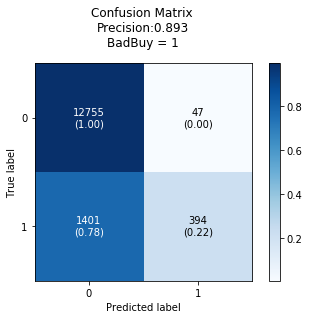

In [31]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
def f2_score(y_true, y_pred):
    return fbeta_score(y_true, y_pred, beta=2, pos_label=1)

def f_half_score(y_true, y_pred):
    return fbeta_score(y_true, y_pred, beta=0.5, pos_label=1)

optimized_bagging = grid2.best_estimator_
pred = optimized_bagging.predict(X_test)

# Calculate our Metric - accuracy
accuracy = accuracy_score(y_test, pred>0.5)
roc_auc = roc_auc_score(y_test, pred>0.5)
prec = precision_score(y_test, pred)
confusion = confusion_matrix(y_test, pred)

print('Best ROC-AUC:' + str(roc_auc))
print('Best Accuracy:' + str(accuracy))
print('Best Precision:' + str(prec))
print('Best Recall:', recall_score(y_test, pred))
print('F1 Score:', f1_score(np.array(y_test), np.array(pred)))
print('F2 Score:', f2_score(np.array(y_test), np.array(pred)))
print('F0.5 Score:', f_half_score(np.array(y_test), np.array(pred)))
print('MCC:', matthews_corrcoef(np.array(y_test), np.array(pred)))

# Confusion Matrix
# Transform to df for easier plotting
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
cm = confusion

binary = np.array(cm)
fig, ax = plot_confusion_matrix(conf_mat=binary,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)

plt.title('Confusion Matrix \nPrecision:{0:.3f}'.format(prec) + '\nBadBuy = 1')
plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.show()

## 3.3 Model Comparison

| Performance     | Base Model | Clustering Model |   | Model Differences |
|-----------------|------------|------------------|---|-------------------|
| Best ROC-AUC:   | 0.61181    | 0.60791          |   | -0.64%            |
| Best Accuracy:  | 0.90176    | 0.90080          |   | -0.11%            |
| Best Precision: | 0.89670    | 0.89342          |   | -0.37%            |
| Best Recall:    | 0.22730    | 0.21950          |   | -3.43%            |
| F1 Score:       | 0.36267    | 0.35242          |   | -2.83%            |
| F2 Score:       | 0.26719    | 0.25850          |   | -3.25%            |
| F0.5 Score:     | 0.56432    | 0.55353          |   | -1.91%            |
| MCC:            | 0.42260    | 0.41408          |   | -2.02%            |


As shown above, our addition of clustering to the model reduced the overall predictive capablities for our model. In truth this may just be a scoring anomaly from retraining given the relative closeness of the performance metrics. 

Our new model with a cluster achieved a MCC of ~0.414, and was successful in correctly classifying 394 bad buys. Our model performance actually decreased by this accounting. From the confusion matrix this is due to 11 bad buys being misclassified as good buys, as compared to the last model.

## 4.0 Deployment Considerations

Deployment is a necessary part post any machine learning product/model development exercise, especially when it is making some kind of prediction. There are three important steps to consider. 

-	Data Preparation
-	Development
-	Deployment

For the purpose of lab submission models were developed with a sample dataset. However, enough consideration required for the accessibility and availability of the future data and amount of data which strictly depends on the scope of the problem and variability of model prediction. Data readiness must be considered for all future car data, as data becomes available from the Auto auctioneer, which will change over time, and the model can be very sensitive to any anomalies or problems with the future test data.
While there are several measurable business impacts of this model, the deployment process requires the centralization of data collection and storage which then requires model to ingest data through automation. Real-time training can be conducted through Azure/Databricks/Spark combination environment which has the functions and algorithms that can support incremental training of incoming data.

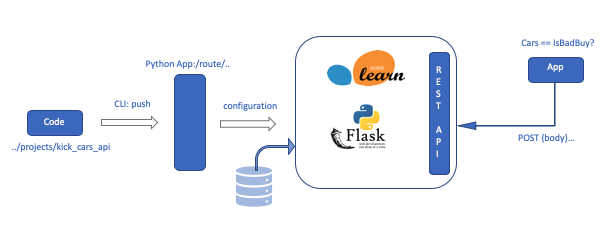

In [12]:
from IPython.display import Image
Image("Deployment3.PNG")

Since we already have an ad-hoc trained model build along with preliminarily results which helps us sets the business expectation. The models could be useful for Auto Dealerships but there are still open questions around the vehicle body and appearance since those predictors are missing from the dataset. To validate the final models, we would check the predictions of the cars in our dataset against the Auto Dealership's pricing strategy for auction vehicles. 

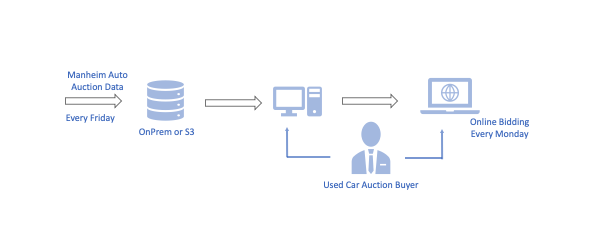

In [11]:
from IPython.display import Image
Image("Deployment2.PNG")

Looking at Auto Dealership process flow diagrams we are able to confirm that our dataset captures the same parameters that are used in their business process of buying (bidding) used car from online auctions. We are confident about the performance of our model at ~0.42 MCC and 0.6118 AUC with 90% accuracy post clustering and therefore somewhat achieving our goals, however, we believe that we can get a better result if we have access to following:

-	A wider, more balanced, dataset if available.  
-	Greater resolution of data for attributes like SubModel, Trim, Engine quality
-	Data enrichment of car quality data, insurance premiums, repair data, and driver/buyer demographics.
-	Greater understanding of data collection/acquisition from the Auto Auctioneer

Our predictors mimic their current process, Bad Buys, and the predicted prices, we could sell this solution as a means to reduce the manual labor, preserve capital efficiency, reduce write-offs, and minimize overhead. 

The model’s value could be measured through the outcomes discussed earlier in terms of 

-	Gains or losses form auction price and retail selling price. 
-	Accuracy of the auction price to the wholesale valuation of the vehicle. 
-	Reduction in labor cost for manual valuation of the vehicles.

Finally, the existing business process warrants that the model would need to be updated at a minimum of every 6 months, preferably faster, since new models are being added and other models are being retired. In an ideal scenario we would recommend updating the models with new sampling and data every Sunday. This would be after a new set of data arrives on Friday, and before the Monday when actual online bidding take place. 


## 5.0 Improving Predictive Power with Neural Networks (MLP)

### Exploring Multi-Layer Perceptron (MLP) Neural Net Models

Unfortunately, there is only marginal improvement on true positive scoring with this new model.

In [24]:
from sklearn.metrics import fbeta_score, matthews_corrcoef, make_scorer
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.neural_network import MLPClassifier
from joblib import parallel_backend

def f_half_score(y_true, y_pred):
    return fbeta_score(y_true, y_pred, beta=0.5, pos_label=1)


# we want to predict the X and y data as follows:
if 'IsBadBuy' in kick_scaled_imputed:
    y = kick_scaled_imputed['IsBadBuy'].values # get the labels we want
    del kick_scaled_imputed['IsBadBuy'] # get rid of the class label
    X = kick_scaled_imputed.values # use everything else to predict!

#split with stratification on y
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=99, 
                                                    stratify=y)

#numeric_features = kick_scaled_imputed.select_dtypes(include=['int64', 'float64']).columns
numeric_features = [kick_scaled_imputed.columns.get_loc(c) 
                    for c in kick_scaled_imputed.select_dtypes(include=['int64', 'float64']).columns 
                    if c in kick_scaled_imputed]

#categorical_features = kick_scaled_imputed.select_dtypes(include=['object']).columns
categorical_features = [kick_scaled_imputed.columns.get_loc(c) 
                        for c in kick_scaled_imputed.select_dtypes(include=['object']).columns
                        if c in kick_scaled_imputed]

preprocessor = ColumnTransformer(
    transformers=[('num', numeric_transformer, numeric_features),
                  ('cat', categorical_transformer, categorical_features)])

param_grid3 = {'classifier__solver': ['adam', 'lbfgs'], 
               'classifier__max_iter': [1000,1250,1500,3000], 
               'classifier__alpha': np.arange(0.0001, 0.15, 0.025), 
               'classifier__hidden_layer_sizes':np.arange(14, 18, 1)}

scoring = {'AUC': 'roc_auc', 'MCC': make_scorer(matthews_corrcoef, greater_is_better=True)}


# define the grid search parameters

classifier = MLPClassifier(max_iter=10)

with parallel_backend('threading'):

    mlp = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', classifier)])


    grid2 = RandomizedSearchCV(mlp, param_grid3, scoring=scoring, refit='MCC', 
                        return_train_score=True, verbose=1, n_jobs = -1, cv = 3, n_iter=100)

    grid2.fit(X_train,y_train)
    results2 = grid2.cv_results_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed: 18.3min
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed: 139.6min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 290.4min finished


In [25]:
# Lets look at the trained model performance with the cluster
pd.DataFrame(results2).sort_values(by=['rank_test_MCC']).transpose()

,83,14,13,22,11,62,34,99,35,23,...,70,41,84,10,1,80,7,60,21,96
mean_fit_time,441.861,356.389,499.576,508.302,499.226,479.972,604.893,239.523,481.321,399.249,...,112.991,192.109,83.7495,207.609,284.098,187.258,131.902,218.018,226.628,86.3628
std_fit_time,12.633,82.4208,59.2782,77.304,130.675,35.8492,92.8873,55.3812,124.646,87.2832,...,3.68429,6.03429,2.08715,1.24335,2.31761,3.22901,0.53331,4.93835,5.45087,4.559
mean_score_time,0.407678,0.557232,0.529526,0.655898,0.620022,0.453641,0.653273,0.304247,0.533389,0.522648,...,0.744704,0.70509,0.636959,0.674184,1.22766,2.11221,1.98246,0.609442,0.597666,0.609431
std_score_time,0.0172907,0.102991,0.0821518,0.236056,0.152181,0.0049134,0.0422523,0.0504928,0.0844831,0.0418955,...,0.0584586,0.107184,0.0453218,0.0869067,0.60438,1.97771,1.12656,0.0519552,0.0939382,0.133349
param_classifier__solver,adam,adam,adam,adam,adam,adam,adam,adam,adam,adam,...,lbfgs,lbfgs,lbfgs,lbfgs,lbfgs,lbfgs,lbfgs,lbfgs,lbfgs,lbfgs
param_classifier__max_iter,1000,1000,1500,3000,1250,3000,1000,3000,1250,1500,...,1250,3000,1250,3000,3000,3000,1500,3000,3000,1250
param_classifier__hidden_layer_sizes,17,16,17,14,14,15,17,15,16,17,...,17,16,17,16,16,17,17,17,17,17
param_classifier__alpha,0.1251,0.1251,0.1001,0.1001,0.1001,0.1001,0.1001,0.1251,0.1251,0.1251,...,0.0251,0.1251,0.1001,0.0501,0.0751,0.1251,0.0001,0.0251,0.0751,0.0501
params,"{'classifier__solver': 'adam', 'classifier__ma...","{'classifier__solver': 'adam', 'classifier__ma...","{'classifier__solver': 'adam', 'classifier__ma...","{'classifier__solver': 'adam', 'classifier__ma...","{'classifier__solver': 'adam', 'classifier__ma...","{'classifier__solver': 'adam', 'classifier__ma...","{'classifier__solver': 'adam', 'classifier__ma...","{'classifier__solver': 'adam', 'classifier__ma...","{'classifier__solver': 'adam', 'classifier__ma...","{'classifier__solver': 'adam', 'classifier__ma...",...,"{'classifier__solver': 'lbfgs', 'classifier__m...","{'classifier__solver': 'lbfgs', 'classifier__m...","{'classifier__solver': 'lbfgs', 'classifier__m...","{'classifier__solver': 'lbfgs', 'classifier__m...","{'classifier__solver': 'lbfgs', 'classifier__m...","{'classifier__solver': 'lbfgs', 'classifier__m...","{'classifier__solver': 'lbfgs', 'classifier__m...","{'classifier__solver': 'lbfgs', 'classifier__m...","{'classifier__solver': 'lbfgs', 'classifier__m...","{'classifier__solver': 'lbfgs', 'classifier__m..."
split0_test_AUC,0.7584,0.756067,0.755181,0.749886,0.753115,0.753346,0.748737,0.755055,0.758769,0.75732,...,0.67531,0.689607,0.670716,0.672314,0.67079,0.662221,0.675447,0.665807,0.669,0.676673


Best ROC-AUC:0.6118443148898652
Best Accuracy:0.8992943755566212
Best Precision:0.8230616302186878
Best Recall: 0.23064066852367687
F1 Score: 0.3603133159268929
F2 Score: 0.26942600546661455
F0.5 Score: 0.5437352245862883
MCC: 0.40272994334035817


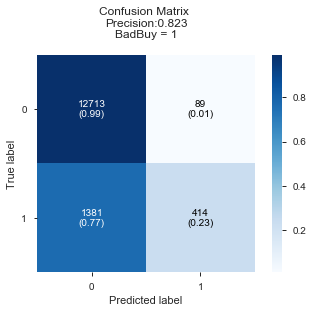

In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, roc_auc_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
def f2_score(y_true, y_pred):
    return fbeta_score(y_true, y_pred, beta=2, pos_label=1)

def f_half_score(y_true, y_pred):
    return fbeta_score(y_true, y_pred, beta=0.5, pos_label=1)

optimized_bagging = grid2.best_estimator_
pred = optimized_bagging.predict(X_test)
# Calculate our Metric - accuracy
accuracy = accuracy_score(y_test, pred>0.5)
roc_auc = roc_auc_score(y_test, pred>0.5)
prec = precision_score(y_test, pred)
confusion = confusion_matrix(y_test, pred)

print('Best ROC-AUC:' + str(roc_auc))
print('Best Accuracy:' + str(accuracy))
print('Best Precision:' + str(prec))
print('Best Recall:', recall_score(y_test, pred))
print('F1 Score:', f1_score(np.array(y_test), np.array(pred)))
print('F2 Score:', f2_score(np.array(y_test), np.array(pred)))
print('F0.5 Score:', f_half_score(np.array(y_test), np.array(pred)))
print('MCC:', matthews_corrcoef(np.array(y_test), np.array(pred)))

#Confusion Matrix
# Transform to df for easier plotting
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
cm = confusion

binary = np.array(cm)
fig, ax = plot_confusion_matrix(conf_mat=binary,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)

plt.title('Confusion Matrix \nPrecision:{0:.3f}'.format(prec) + '\nBadBuy = 1')
plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.show()